# 1. Import modules and load MERFISH data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os

import matplotlib.pyplot as plt

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')

# 2. Load MERLin analysis results

In [2]:
merlin_output_folder = r'D:\MERFISH_Analysis\20221008-thymus_MOp_test'
# generate post-analysis folders
postanalysis_folder = os.path.join(merlin_output_folder, 'PostAnalysis')
if not os.path.exists(postanalysis_folder):
    print(f"Create postanalysis_folder: {postanalysis_folder}")
    os.makedirs(postanalysis_folder)
else:
    print(f"Use postanalysis_folder: {postanalysis_folder}")

Create postanalysis_folder: D:\MERFISH_Analysis\20221008-thymus_MOp_test\PostAnalysis


In [3]:
figure_folder = os.path.join(postanalysis_folder, 'Figures')
if not os.path.exists(figure_folder):
    print(f"Create figure_folder: {figure_folder}")
    os.makedirs(figure_folder)
else:
    print(f"Use figure_folder: {figure_folder}")

sc.settings.figdir = figure_folder

Create figure_folder: D:\MERFISH_Analysis\20221008-thymus_MOp_test\PostAnalysis\Figures


## Load metadata

In [14]:
# Load Cell information
cell_meta_data_file = os.path.join(merlin_output_folder, 'ExportCellMetadata', 'feature_metadata.csv')
cell_meta_data = pd.read_csv(cell_meta_data_file)
cell_meta_data

Unnamed: 0  fov      volume     center_x  \
0      100350247465816806033524045302843726814    0   11.159124 -1652.534024   
1       10046164644841133605766761535903609951    0   35.282610 -1475.954020   
2      100646307838877472132870468715758433103    0   64.529450 -1503.008020   
3      100726328560226005872065106762676164119    0   56.269413 -1656.638024   
4      100903466044236621175060398312366309237    0   82.960088 -1519.910021   
...                                        ...  ...         ...          ...   
25869   99445587591626375466156129665279560275   19  270.689203  -967.160022   
25870    9958008787376206929521152428523157440   19  275.976670 -1021.970023   
25871   99580308025739345895390924906569261669   19  144.839769  -996.158023   
25872   99817943902979413356238304922947609591   19   28.270388  -941.564021   
25873   99869025624113536004963047992938299728   19  215.762258  -883.028020   

          center_y        min_x        max_x        min_y        max_y  
0     -1905.491973 -1654.758824 -1650.309224 -1908.526773 -1902.457173  
1     -1876.385972 -1480.014820 -1471.893219 -1880.338772 -1872.433172  
2     -1851.599972 -1505.718820 -1500.297220 -1854.310772 -1848.889172  
3     -1981.739975 -1660.158824 -1653.117224 -1984.990775 -1978.489175  
4     -1974.341975 -1522.782821 -1517.037221 -1977.106775 -1971.577175  
...            ...          ...          ...          ...          ...  
25869 -2451.978094  -973.434822  -960.885222 -2457.442894 -2446.513294  
25870 -2445.390094 -1025.814823 -1018.125223 -2449.666894 -2441.113294  
25871 -2452.086094 -1000.434823  -991.881223 -2455.822894 -2448.349294  
25872 -2573.424097  -944.058821  -939.069221 -2575.810897 -2571.037297  
25873 -2518.668096  -887.358820  -878.697220 -2522.026896 -2515.309295  

[25874 rows x 9 columns]

In [15]:
# Load decoded counts information
counts_file_mer = os.path.join(merlin_output_folder, 'ExportPartitionedBarcodes', 'barcodes_per_feature.csv')
df = pd.read_csv(counts_file_mer).rename(columns={'Unnamed: 0':'index'}).set_index('index')

In [16]:
# remove blanks
blanks = [_c for _c in df.columns if 'Blank-' in _c]
df = df.drop(columns=blanks)

adata = anndata.AnnData(df)
adata.obs = adata.obs.merge(cell_meta_data, left_index=True, right_on='Unnamed: 0').set_index('Unnamed: 0')

df

1700022I11Rik  1810046K07Rik  \
index                                                                   
100350247465816806033524045302843726814            0.0            0.0   
10046164644841133605766761535903609951             0.0            0.0   
100646307838877472132870468715758433103            0.0            0.0   
100726328560226005872065106762676164119            0.0            0.0   
100903466044236621175060398312366309237            0.0            0.0   
...                                                ...            ...   
99445587591626375466156129665279560275             0.0            0.0   
9958008787376206929521152428523157440              0.0            0.0   
99580308025739345895390924906569261669             0.0            0.0   
99817943902979413356238304922947609591             0.0            0.0   
99869025624113536004963047992938299728             0.0            0.0   

                                         5031425F14Rik  5730522E02Rik  Acta2  \
index                                                                          
100350247465816806033524045302843726814            0.0            0.0    0.0   
10046164644841133605766761535903609951             0.0            0.0    0.0   
100646307838877472132870468715758433103            0.0            0.0    0.0   
100726328560226005872065106762676164119            0.0            0.0    0.0   
100903466044236621175060398312366309237            0.0            0.0    0.0   
...                                                ...            ...    ...   
99445587591626375466156129665279560275             0.0            0.0    0.0   
9958008787376206929521152428523157440              0.0            0.0    0.0   
99580308025739345895390924906569261669             0.0            0.0    0.0   
99817943902979413356238304922947609591             0.0            0.0    0.0   
99869025624113536004963047992938299728             0.0            0.0    0.0   

                                         Adam2  Adamts2  Adamts4  Adra1b  Alk  \
index                                                                           
100350247465816806033524045302843726814    0.0      0.0      0.0     0.0  0.0   
10046164644841133605766761535903609951     0.0      0.0      0.0     0.0  0.0   
100646307838877472132870468715758433103    0.0      0.0      0.0     0.0  0.0   
100726328560226005872065106762676164119    0.0      0.0      0.0     0.0  0.0   
100903466044236621175060398312366309237    0.0      0.0      0.0     0.0  0.0   
...                                        ...      ...      ...     ...  ...   
99445587591626375466156129665279560275     0.0      0.0      0.0     0.0  0.0   
9958008787376206929521152428523157440      0.0      0.0      0.0     0.0  0.0   
99580308025739345895390924906569261669     0.0      0.0      0.0     0.0  0.0   
99817943902979413356238304922947609591     0.0      0.0      0.0     0.0  0.0   
99869025624113536004963047992938299728     0.0      0.0      0.0     0.0  0.0   

                                         ...  Unc13c  Unc5b  Unc5d  Ust  \
index                                    ...                              
100350247465816806033524045302843726814  ...     0.0    0.0    0.0  0.0   
10046164644841133605766761535903609951   ...     0.0    0.0    0.0  0.0   
100646307838877472132870468715758433103  ...     0.0    0.0    0.0  0.0   
100726328560226005872065106762676164119  ...     0.0    0.0    0.0  0.0   
100903466044236621175060398312366309237  ...     0.0    0.0    0.0  0.0   
...                                      ...     ...    ...    ...  ...   
99445587591626375466156129665279560275   ...     0.0    0.0    0.0  0.0   
9958008787376206929521152428523157440    ...     0.0    0.0    0.0  0.0   
99580308025739345895390924906569261669   ...     0.0    0.0    0.0  0.0   
99817943902979413356238304922947609591   ...     0.0    0.0    0.0  0.0   
99869025624113536004963047992938299728   ...     0.0    0.0    0.0  0.0   

                    

# 4. Preprocess and filter the MERFISH data 

In [17]:
# Calculate quality control metrics
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

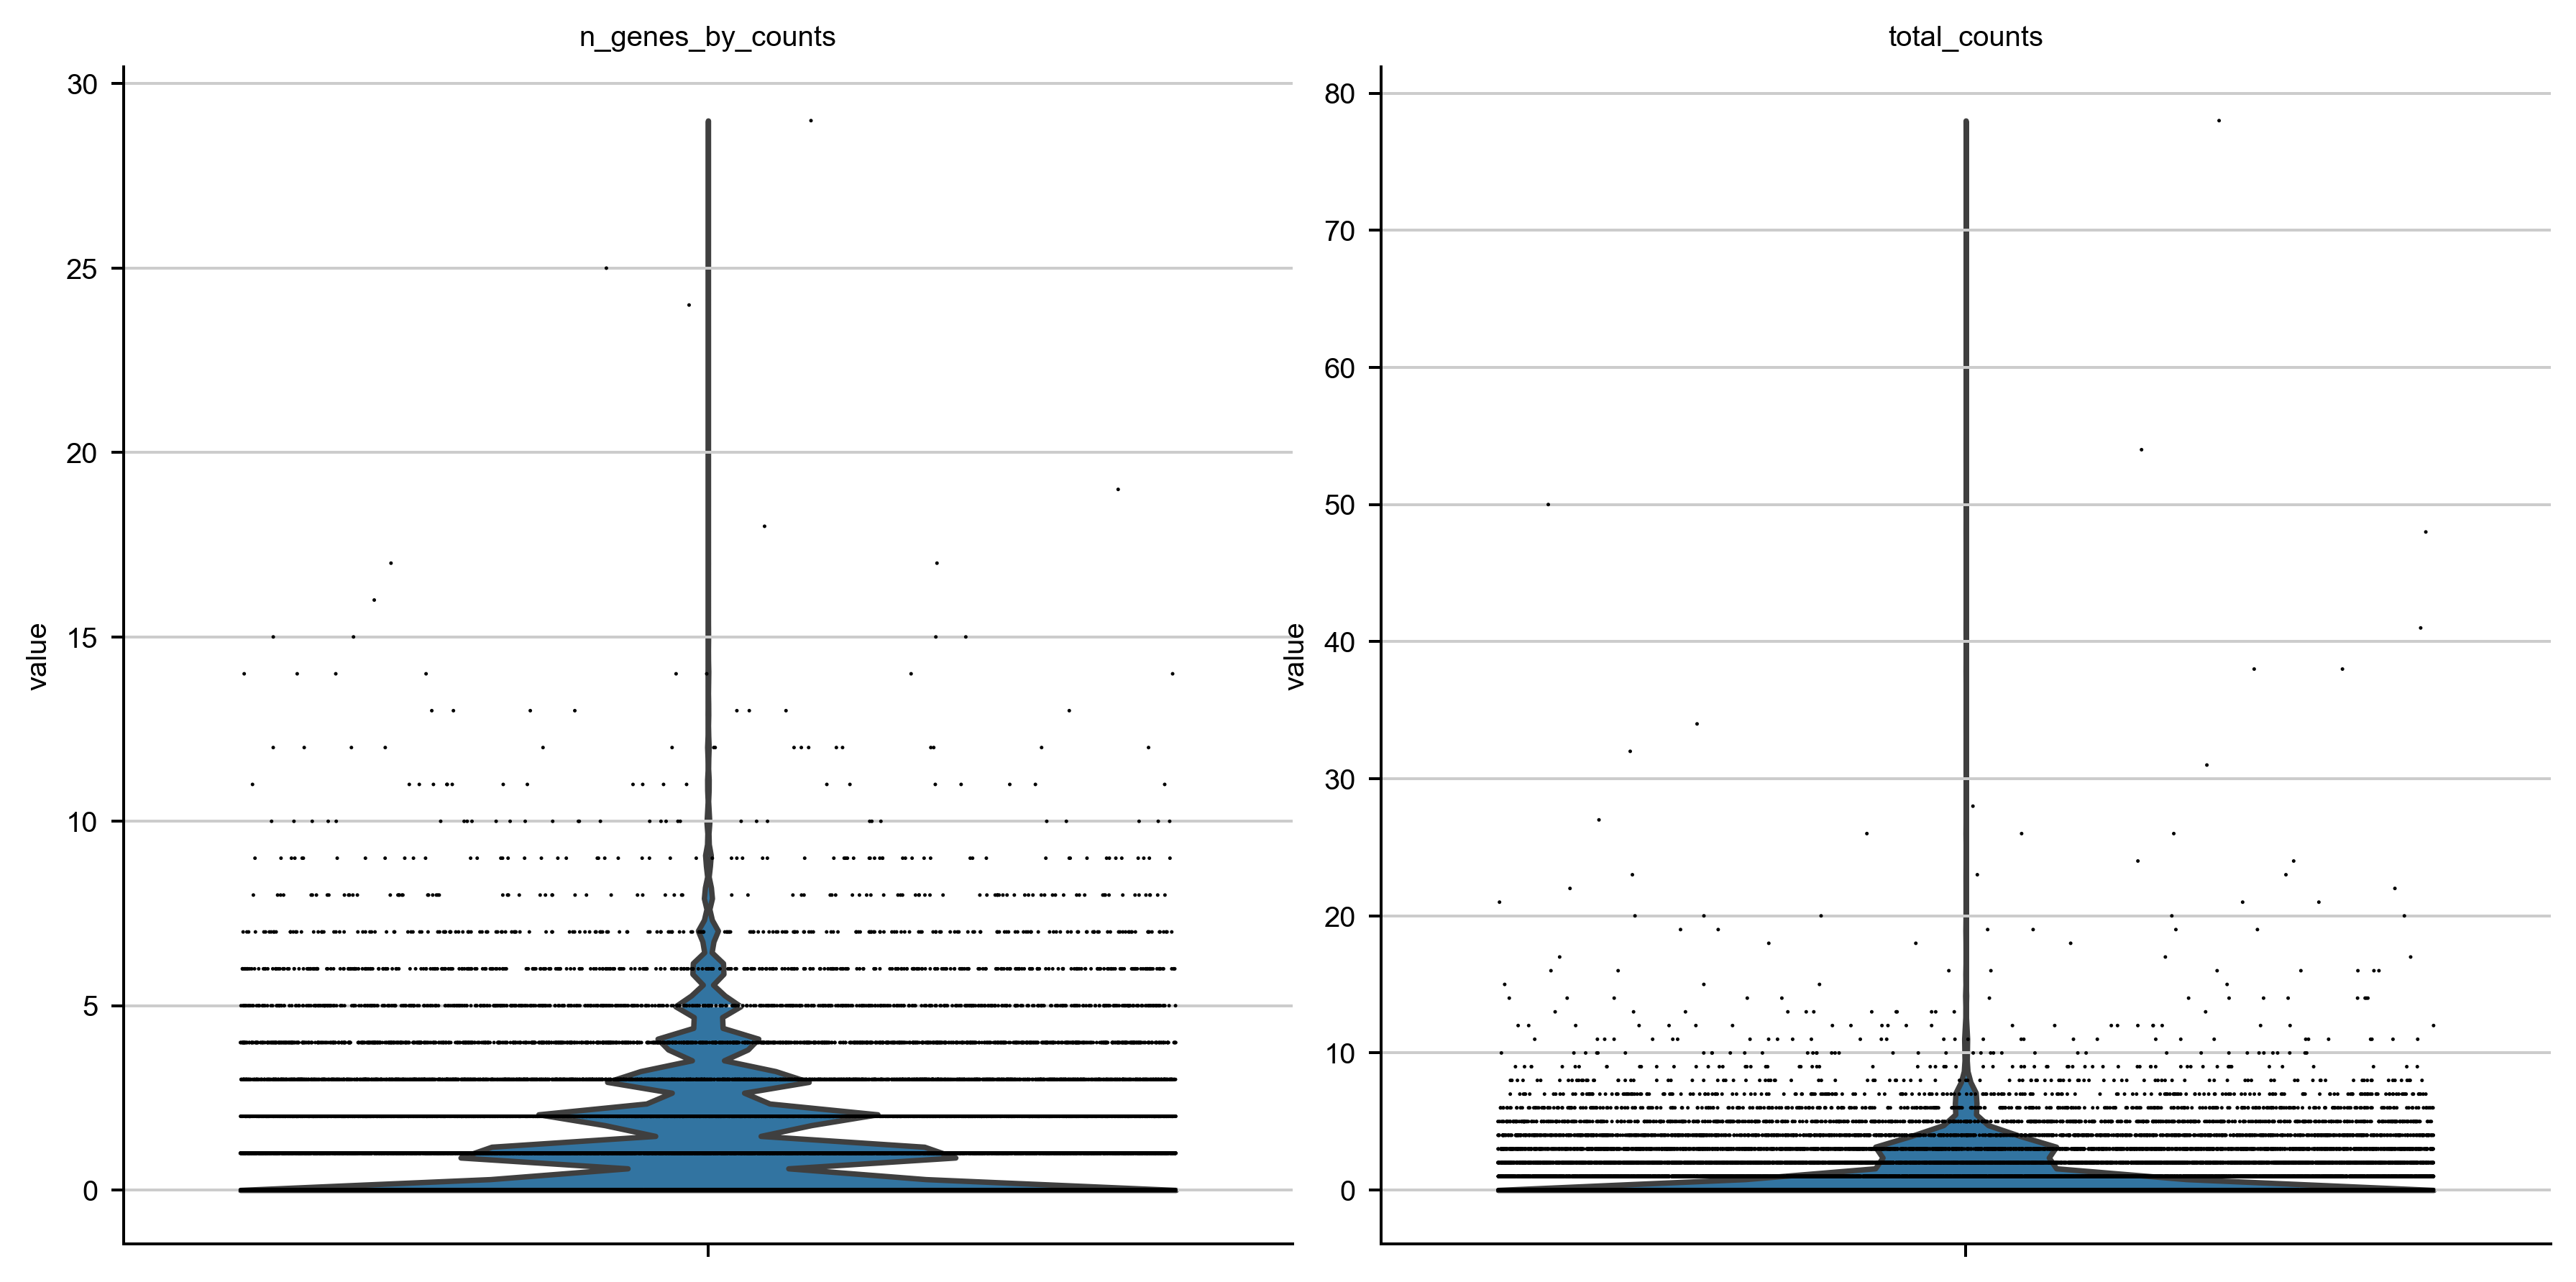

In [18]:
# A violin plot of some of the computed quality measures:
# - the number of genes expressed in the count matrix
# - the total counts per cell
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

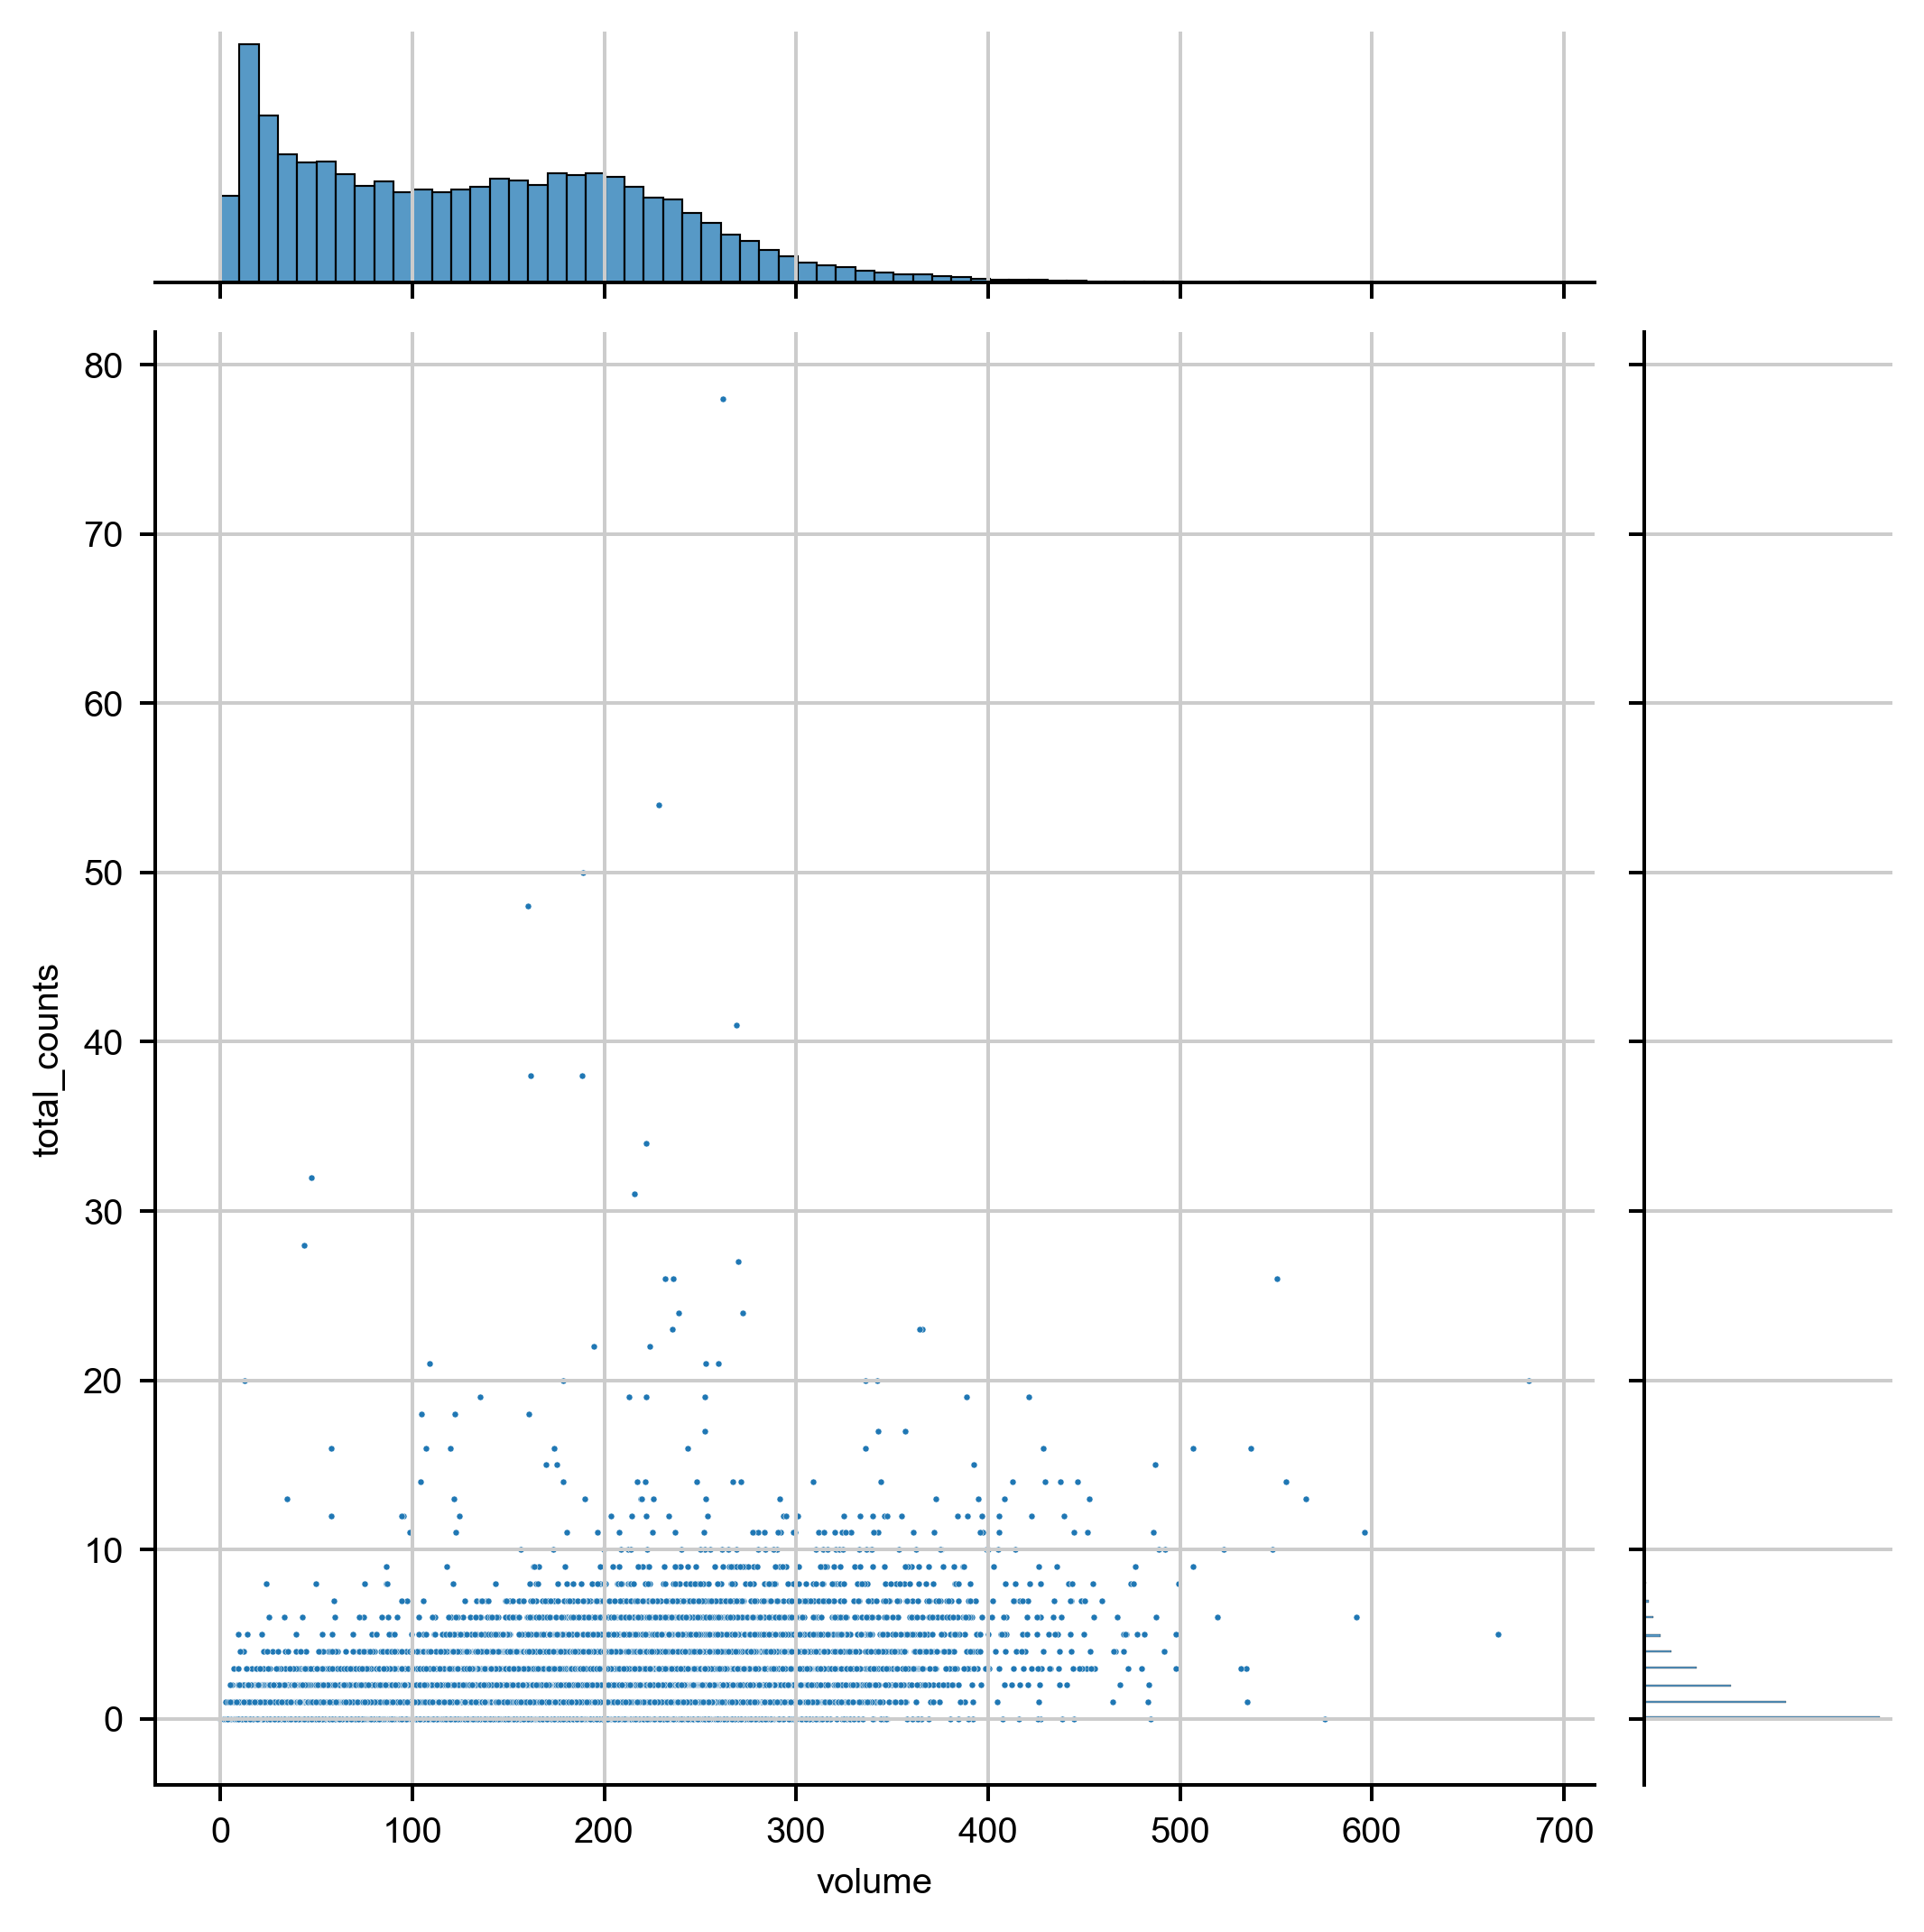

In [19]:
sns.jointplot(data=adata.obs, x='volume', y='total_counts', s=2,)

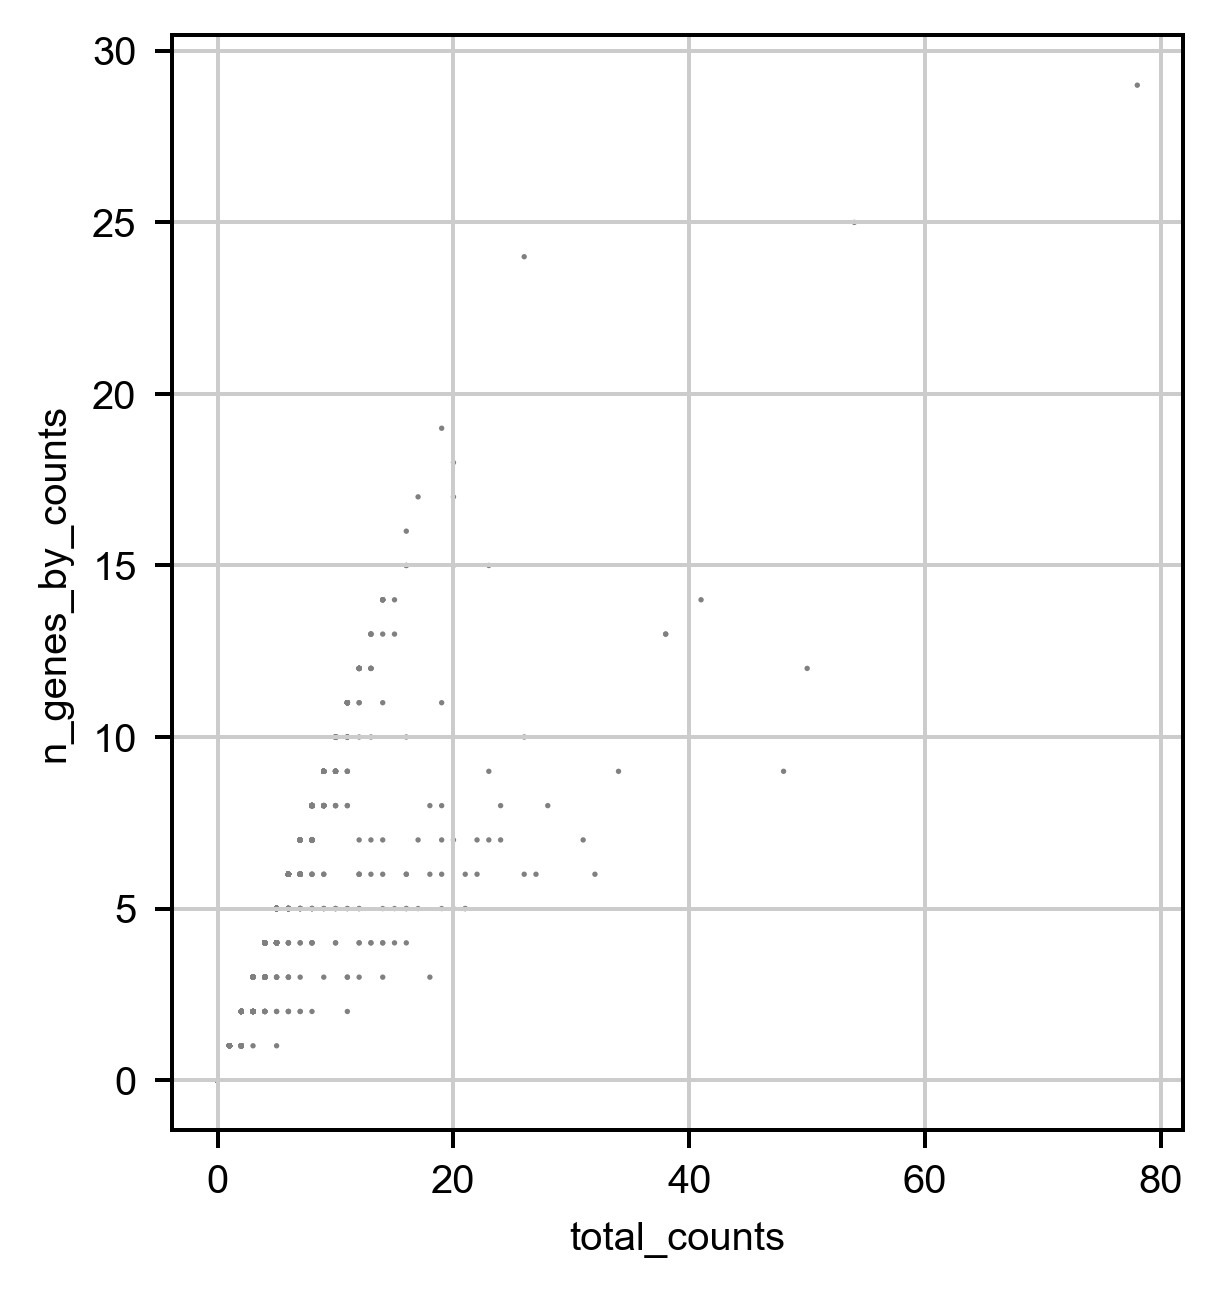

In [20]:
# Plot the distributions of gene counts
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [21]:
gene_count_threshold = 2
total_count_threshold = 5
volume_threshold = 100
volume_upper_threshold = 6000
# Filtering
adata = adata[adata.obs['n_genes_by_counts'] > gene_count_threshold]
adata = adata[adata.obs['total_counts'] > total_count_threshold]
adata = adata[adata.obs['volume'] > volume_threshold]
adata = adata[adata.obs['volume'] <= volume_upper_threshold]

print(len(adata) / len(cell_meta_data) , len(adata))

0.037798562263275874 978


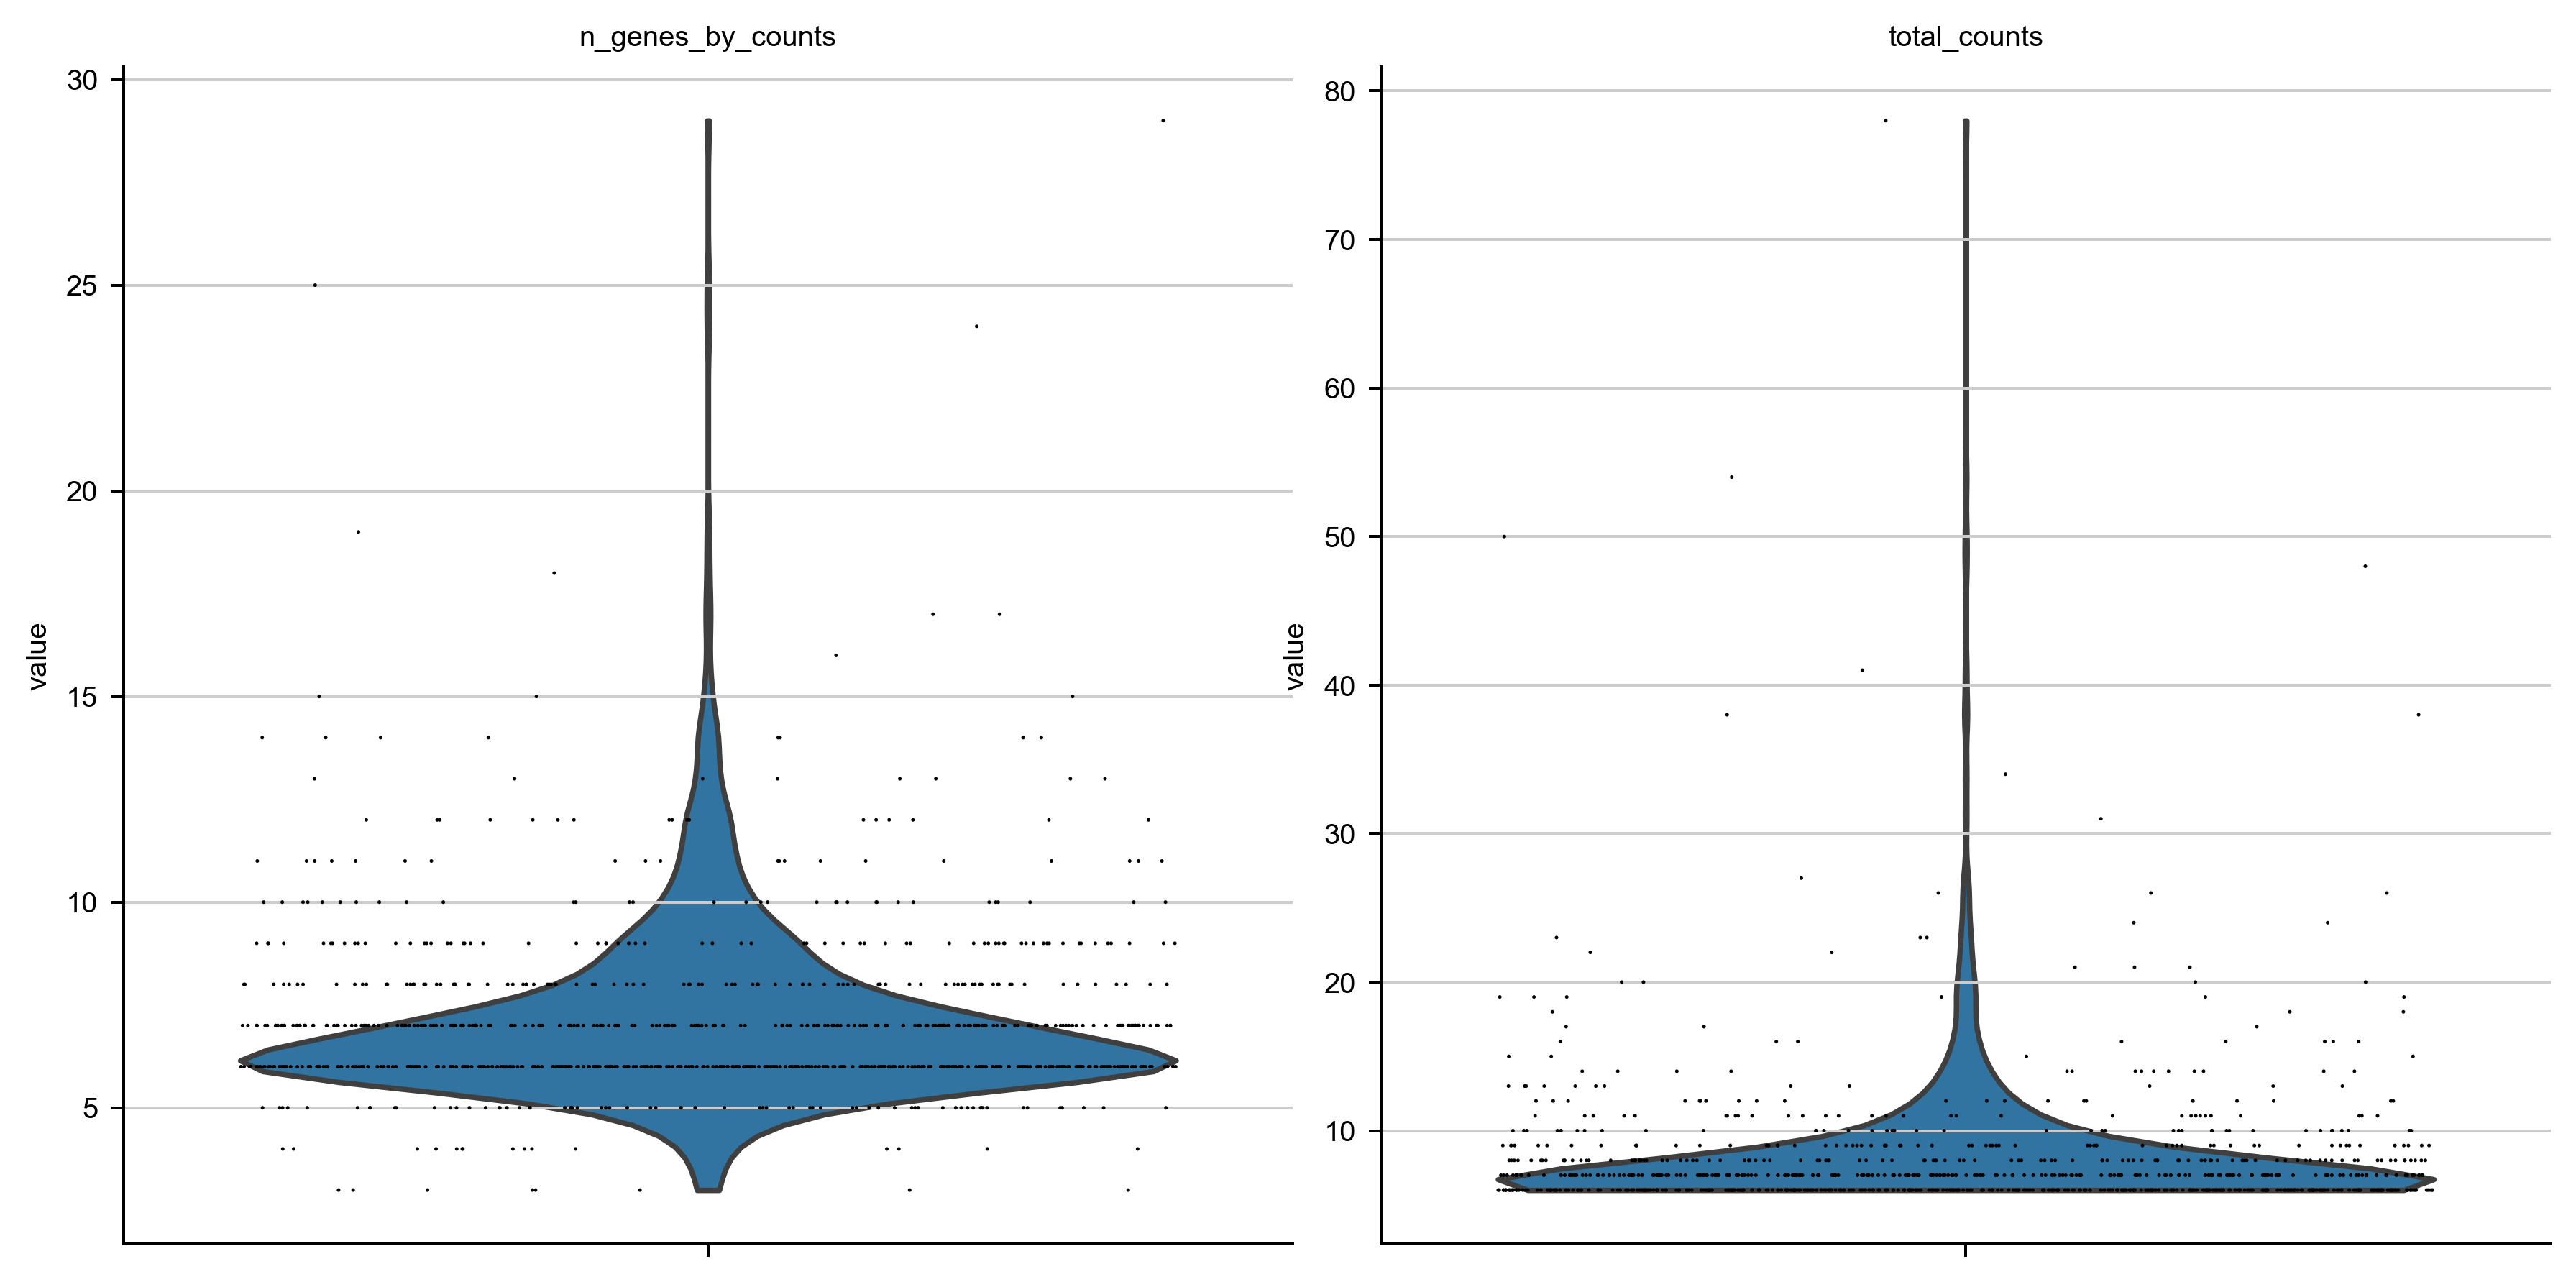

In [22]:
# A violin plot of some of the computed quality measures:
# - the number of genes expressed in the count matrix
# - the total counts per cell
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True, save='_after_filter_counts.png')

In [23]:
# plot mean count
adata.obs['total_counts'].mean()

8.266871452331543

## 4. PCA and UMAP of the MERFISH data (for quick test)

E:\Users\puzheng\anaconda3\envs\merlin_postanalysis\lib\site-packages\scanpy\preprocessing\_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


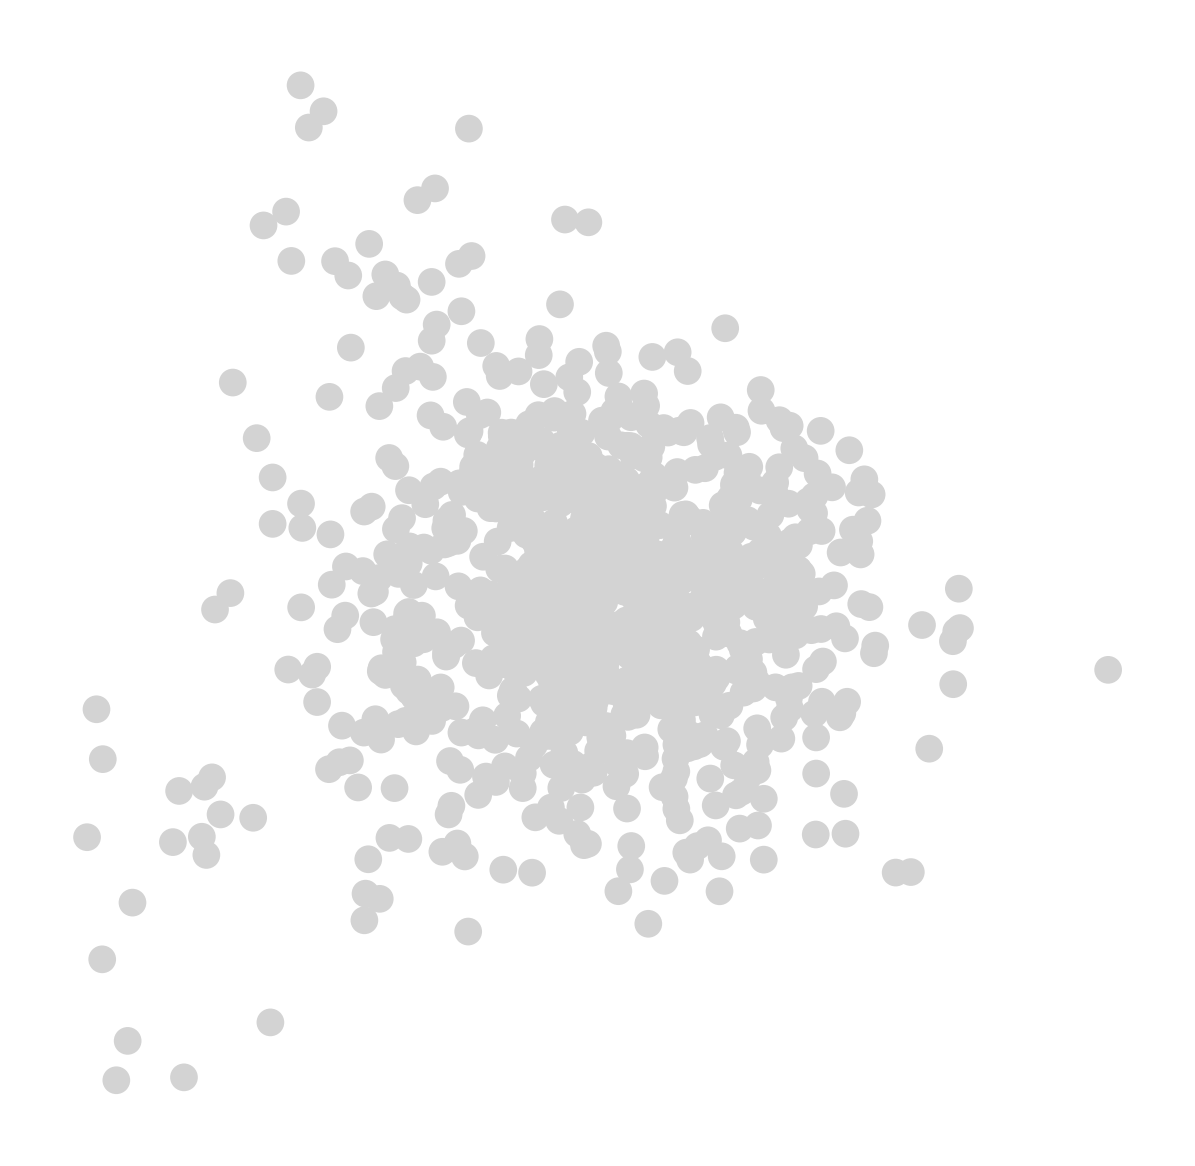

CPU times: total: 6.12 s
Wall time: 11.9 s


In [24]:
%%time
# Total-count normalize (library-size correct) the data matrix to 10,000 reads per cell
sc.pp.normalize_total(adata, target_sum=1e2)
# Logarithmize the data
sc.pp.log1p(adata)
# Regress out total counts
sc.pp.regress_out(adata, 'total_counts')
# Convert gene expressions to Z-scores
sc.pp.scale(adata, max_value=10)
# Principal component analysis
sc.tl.pca(adata, svd_solver='arpack')
# Plot the PCA results
sc.pl.pca(adata)

In [25]:
%%time
# Computing the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=30)

E:\Users\puzheng\anaconda3\envs\merlin_postanalysis\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: total: 18.4 s
Wall time: 9.69 s


In [26]:
%%time
# Clustering
sc.tl.leiden(adata, resolution=0.5)

CPU times: total: 2.02 s
Wall time: 133 ms


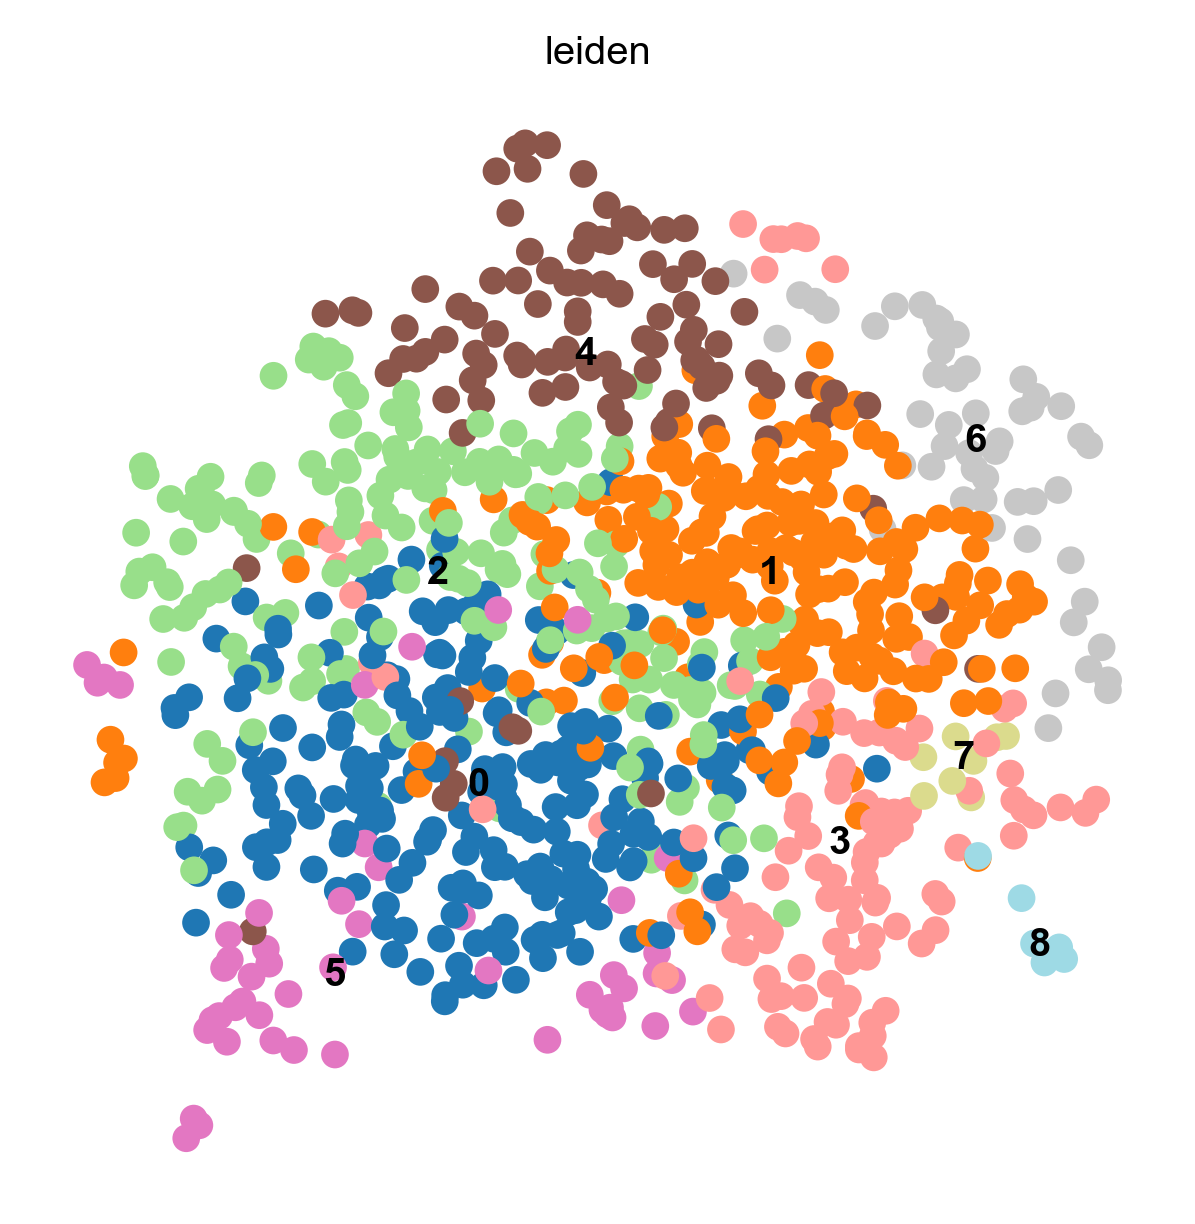

CPU times: total: 1.84 s
Wall time: 1.94 s


In [28]:
%%time
# Embed with UMAP
sc.tl.umap(adata)
# Plot the UMAP
sc.pl.umap(adata, color='leiden', 
           legend_loc='on data',
           palette='tab20',
           save='_cluster.png',
           )

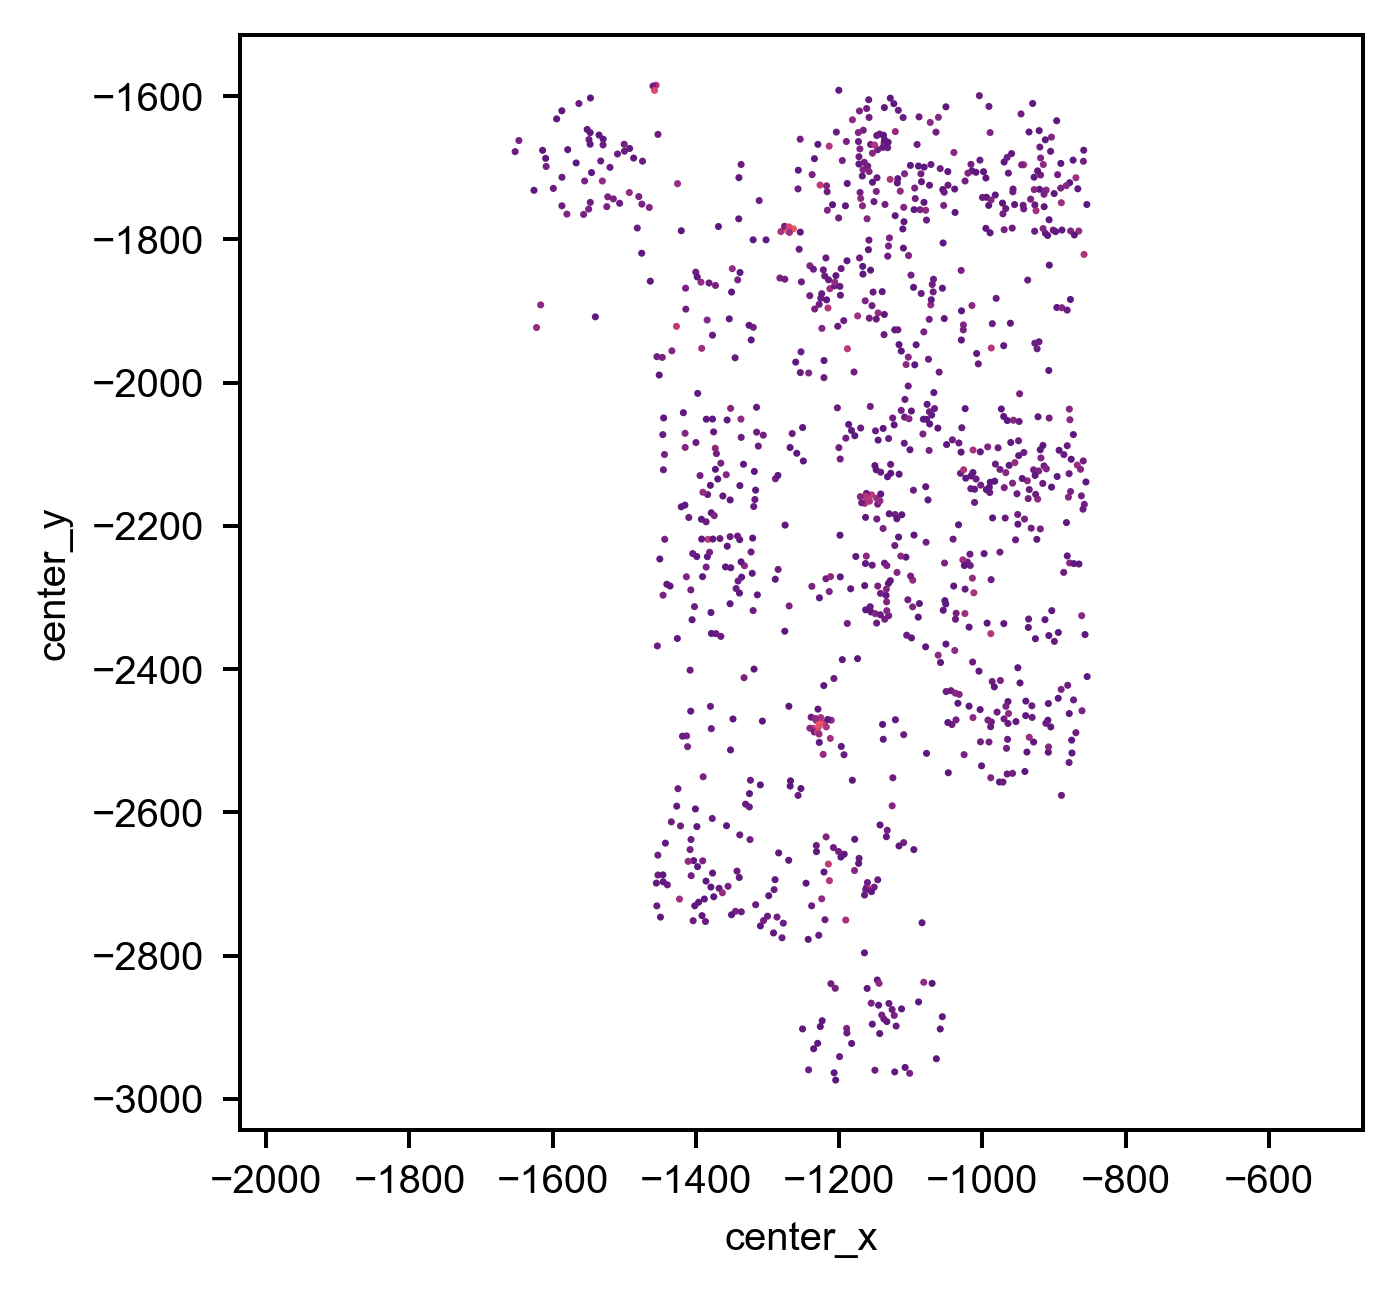

In [29]:
# visualzie the spatial dist for clusters
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
#plt.style.use('dark_background')
ax = sns.scatterplot(data=adata.obs, x='center_x', y='center_y', 
                     hue='total_counts', hue_norm=LogNorm(vmin=1e-0,vmax=500), 
                     palette='magma',
                     s=2, linewidth=0,
                     legend=False, )
ax.grid(False)
plt.axis('equal')
hs, ls = ax.get_legend_handles_labels()
#ax.legend(hs,ls, ncol=8, loc=8)
#plt.xlim([2250,3850])
#plt.ylim([-1600,0])
plt.savefig(os.path.join(figure_folder, 'spatial-total_counts.png'), transparent=True)
plt.show()

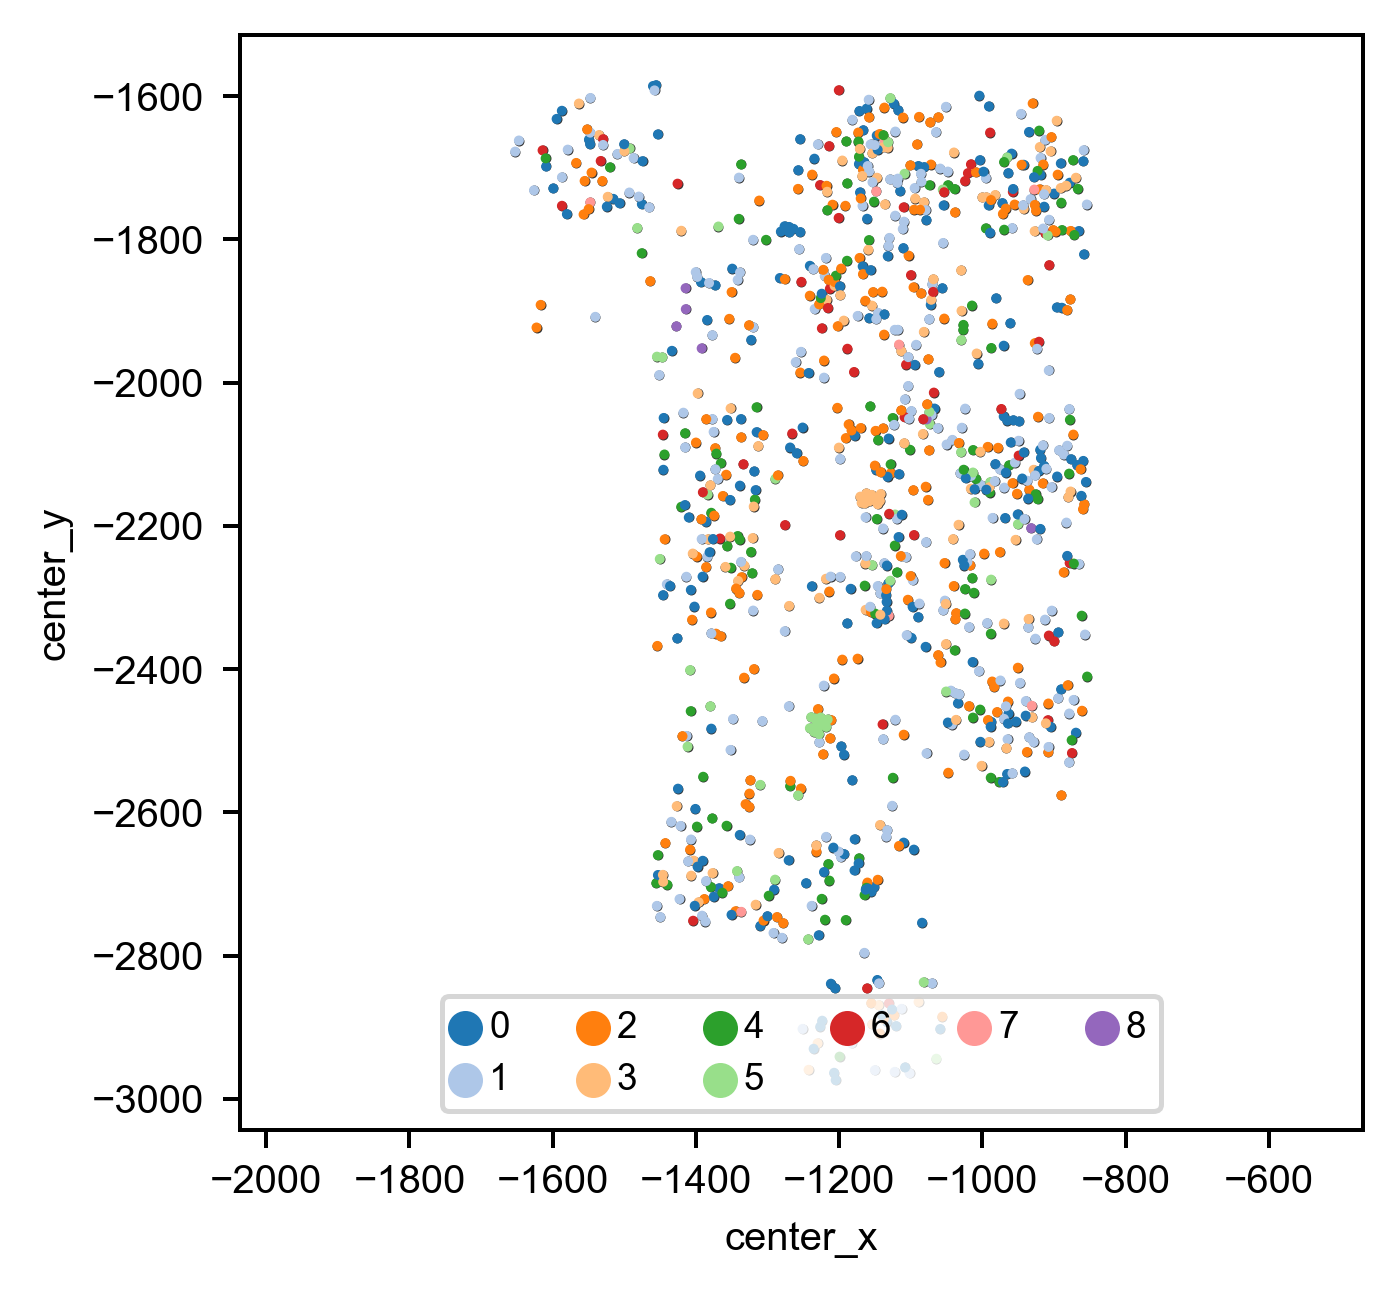

In [31]:
import matplotlib.pyplot as plt
# visualzie the spatial dist for clusters
#sel_clusters = ['0', '1', '2', '3', '4', '5']
sel_clusters = np.unique(adata.obs['leiden'])

sel_inds = [_i for _i, _cls in zip(adata.obs.index, adata.obs['leiden']) if _cls in sel_clusters]
ax1 = sns.scatterplot(data=adata.obs, x='center_x', y='center_y', 
                      color=[0.2,0.2,0.2], s=4, legend=True, linewidth=0)

ax = sns.scatterplot(data=adata.obs.loc[sel_inds], x='center_x', y='center_y', 
                     palette='tab20',
                     hue='leiden', s=4, legend=True, linewidth=0)
ax.grid(False)
plt.axis('equal')
hs, ls = ax.get_legend_handles_labels()
ax.legend(hs,ls, ncol=6, loc=8)
#plt.xlim([2250,3850])
#plt.ylim([-1600,0])
plt.savefig(os.path.join(figure_folder, 'spatial-all_clusters.png'), transparent=True)
plt.show()

# 6.UMAP can be done using different settings and can be saved into different label column for cell type classifer use later

## 6.1 Use higher expected pcs and resolution to UMAP for cell-type distinction at "cluster" level

In [23]:
# direcly use previous leiden
adata.obs['leiden_cluster'] = adata.obs.leiden

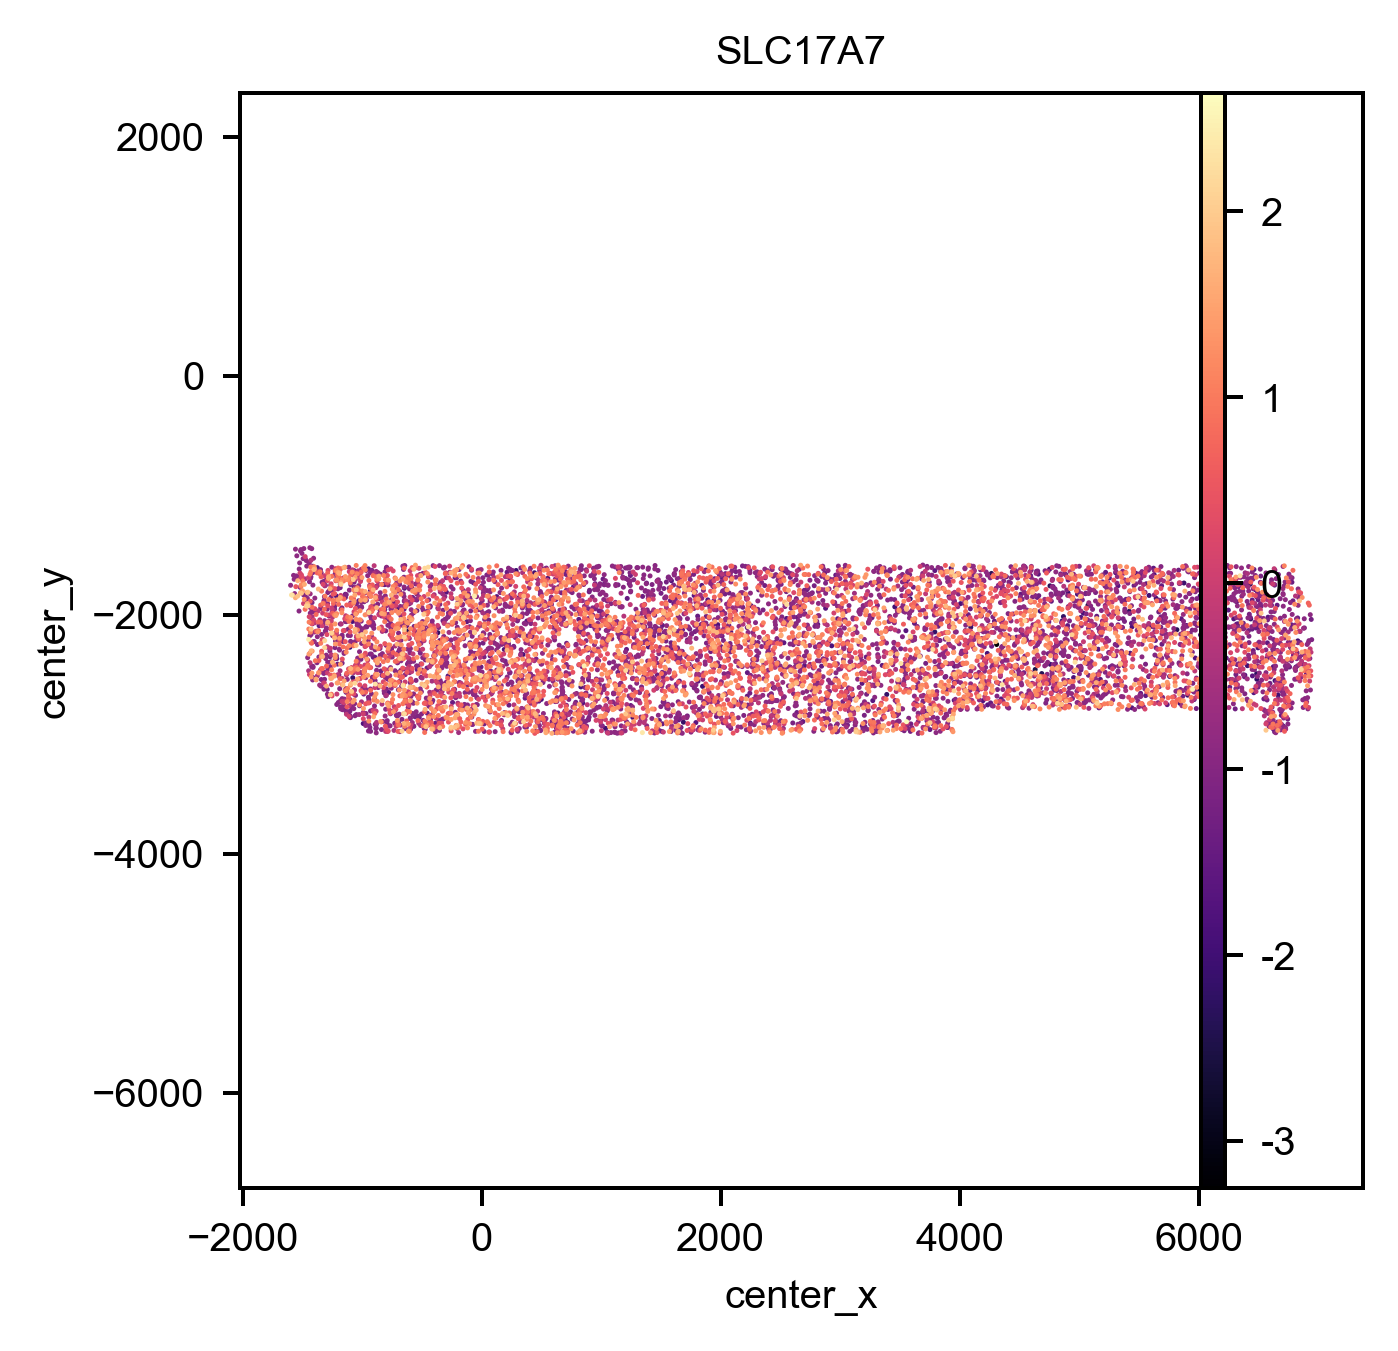

In [43]:
fig, ax = plt.subplots()
ax.grid(False)
plt.axis('equal')

sc.pl.scatter(adata, x='center_x', y='center_y', color='SLC17A7', 
              size=4, #vmin=-1, vmax=5,
              frameon=False,
              color_map='magma',
              #colorbar=False,
              ax=ax,)

plt.show()

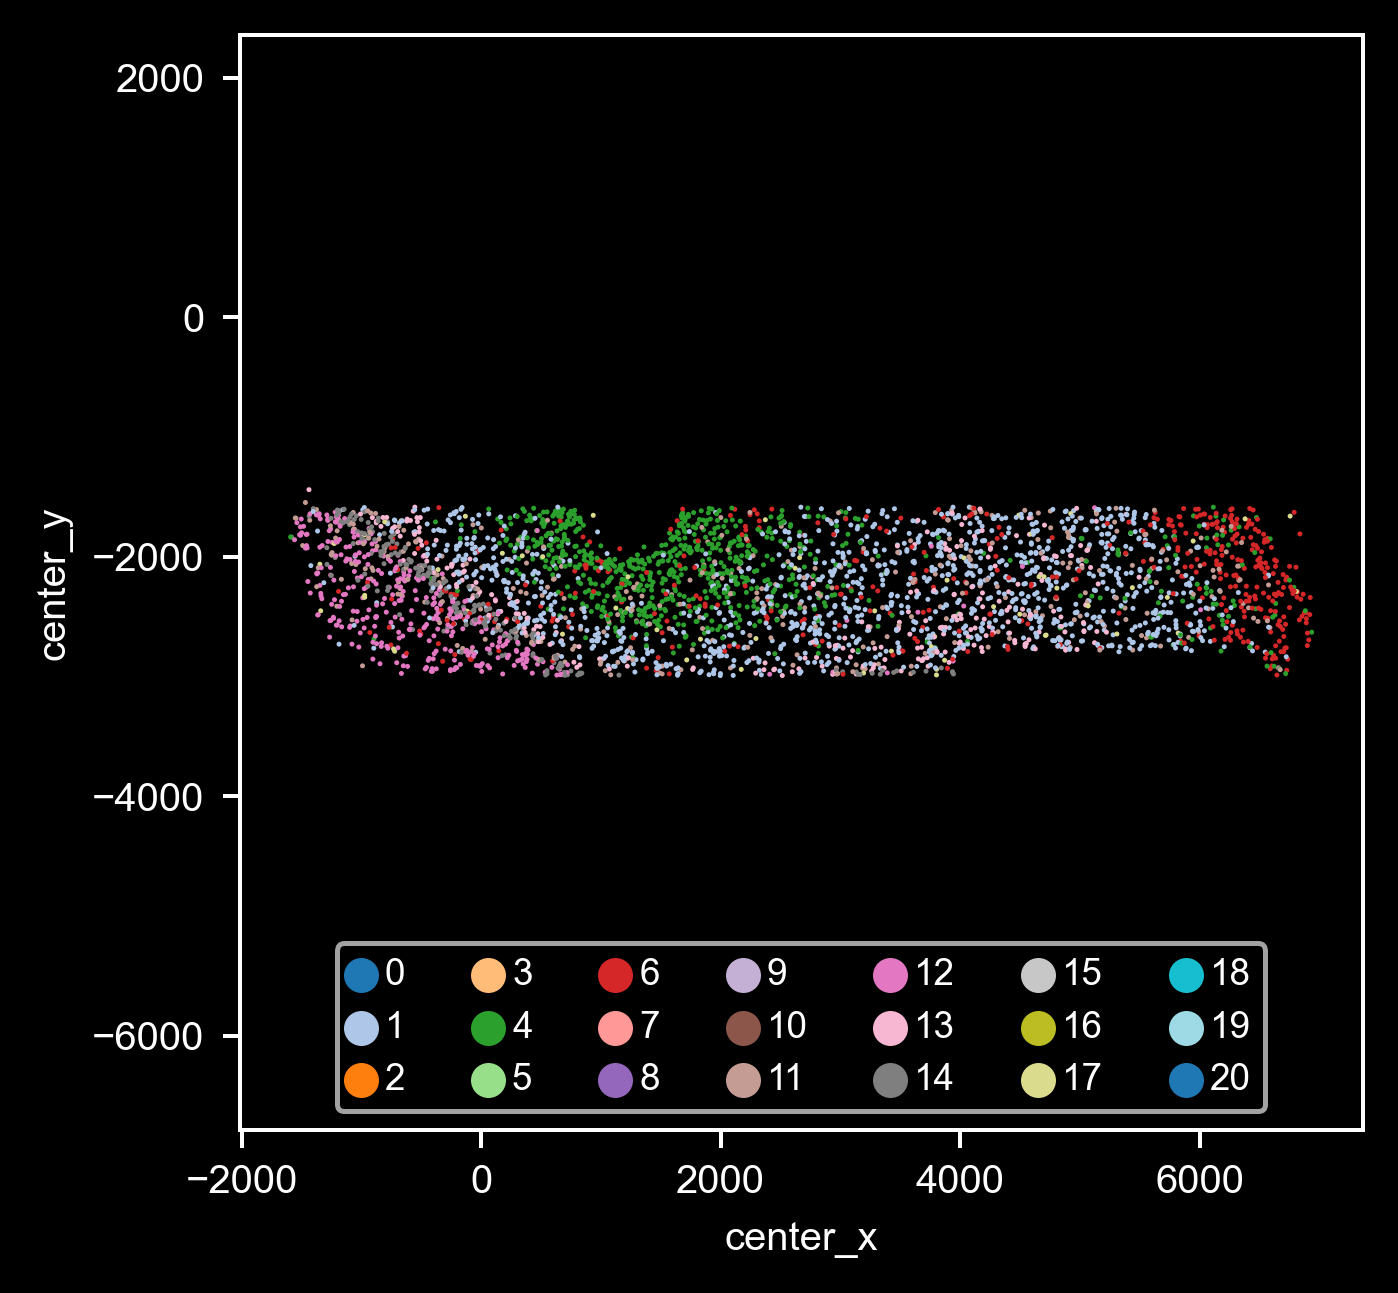

In [105]:
# visualzie the spatial dist for clusters
import matplotlib.pyplot as plt
plt.style.use('dark_background')
#sel_clusters = ['0', '1', '2', '3', '4', '5']
sel_clusters = ['1', '4', '6', '11', '12', '13', '14', '17']# '3', '5', '7', '8', '11']
#sel_clusters = np.unique(adata.obs['leiden_cluster'])

sel_inds = [_i for _i, _cls in zip(adata.obs.index, adata.obs['leiden_cluster']) if _cls in sel_clusters]
#ax1 = sns.scatterplot(data=adata.obs, x='center_x', y='center_y', 
#                      color=[0.9,0.9,0.9], s=1, legend=True, linewidth=0)

ax = sns.scatterplot(data=adata.obs.loc[sel_inds], x='center_x', y='center_y', 
                     palette='tab20',
                     hue='leiden_cluster', s=1, legend=True, linewidth=0)
ax.grid(False)
plt.axis('equal')
hs, ls = ax.get_legend_handles_labels()
ax.legend(hs,ls, ncol=7, loc=8)
#plt.xlim([2250,3850])
#plt.ylim([-1600,0])
#plt.savefig(os.path.join(figure_folder, 'spatial_sel_clusters.png'), transparent=True)

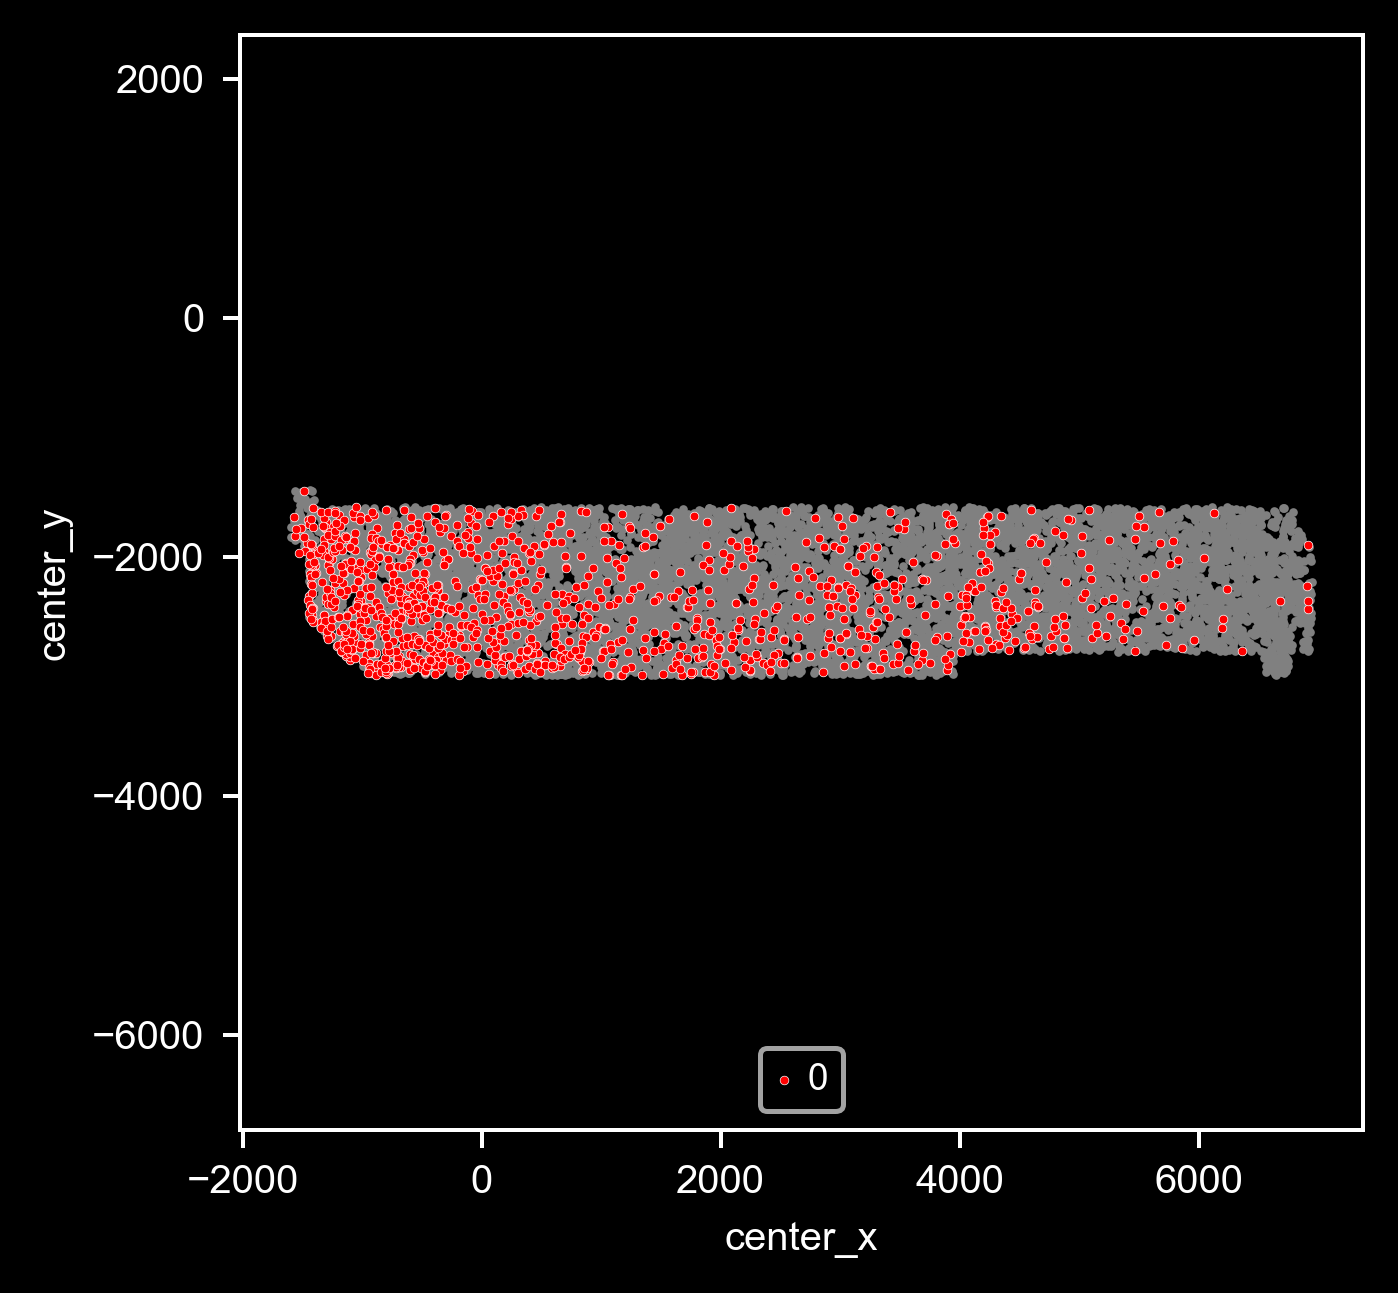

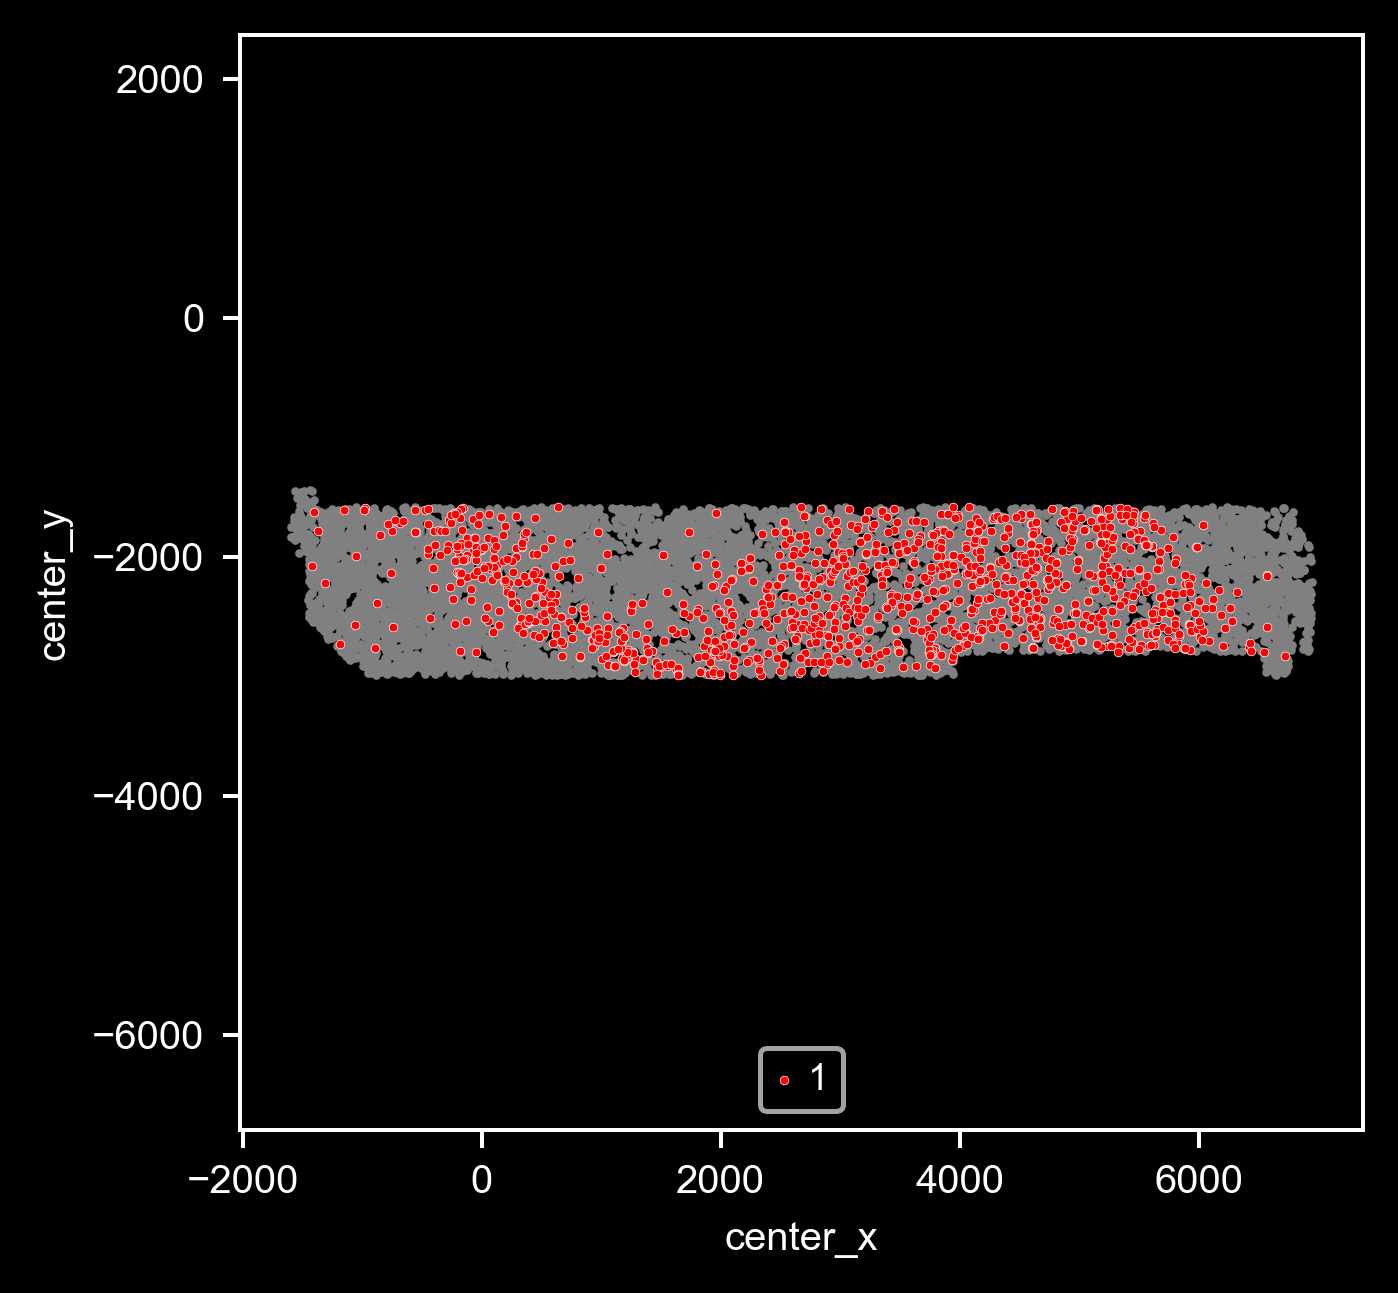

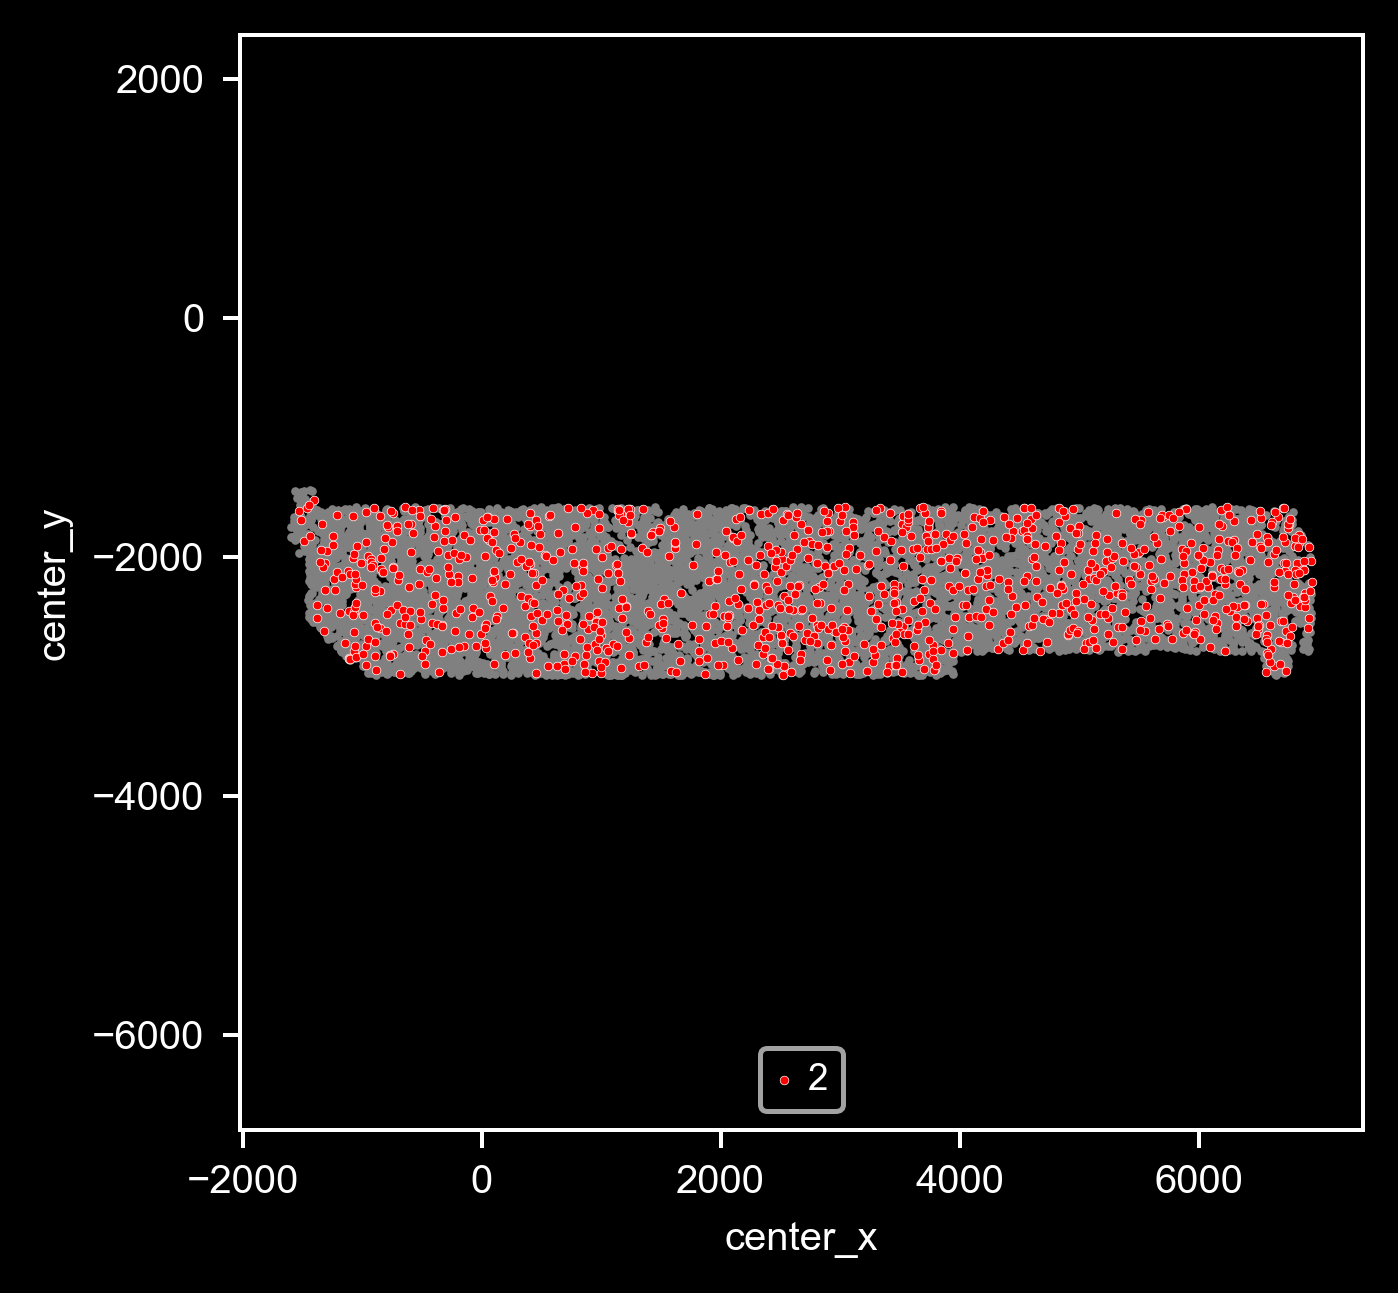

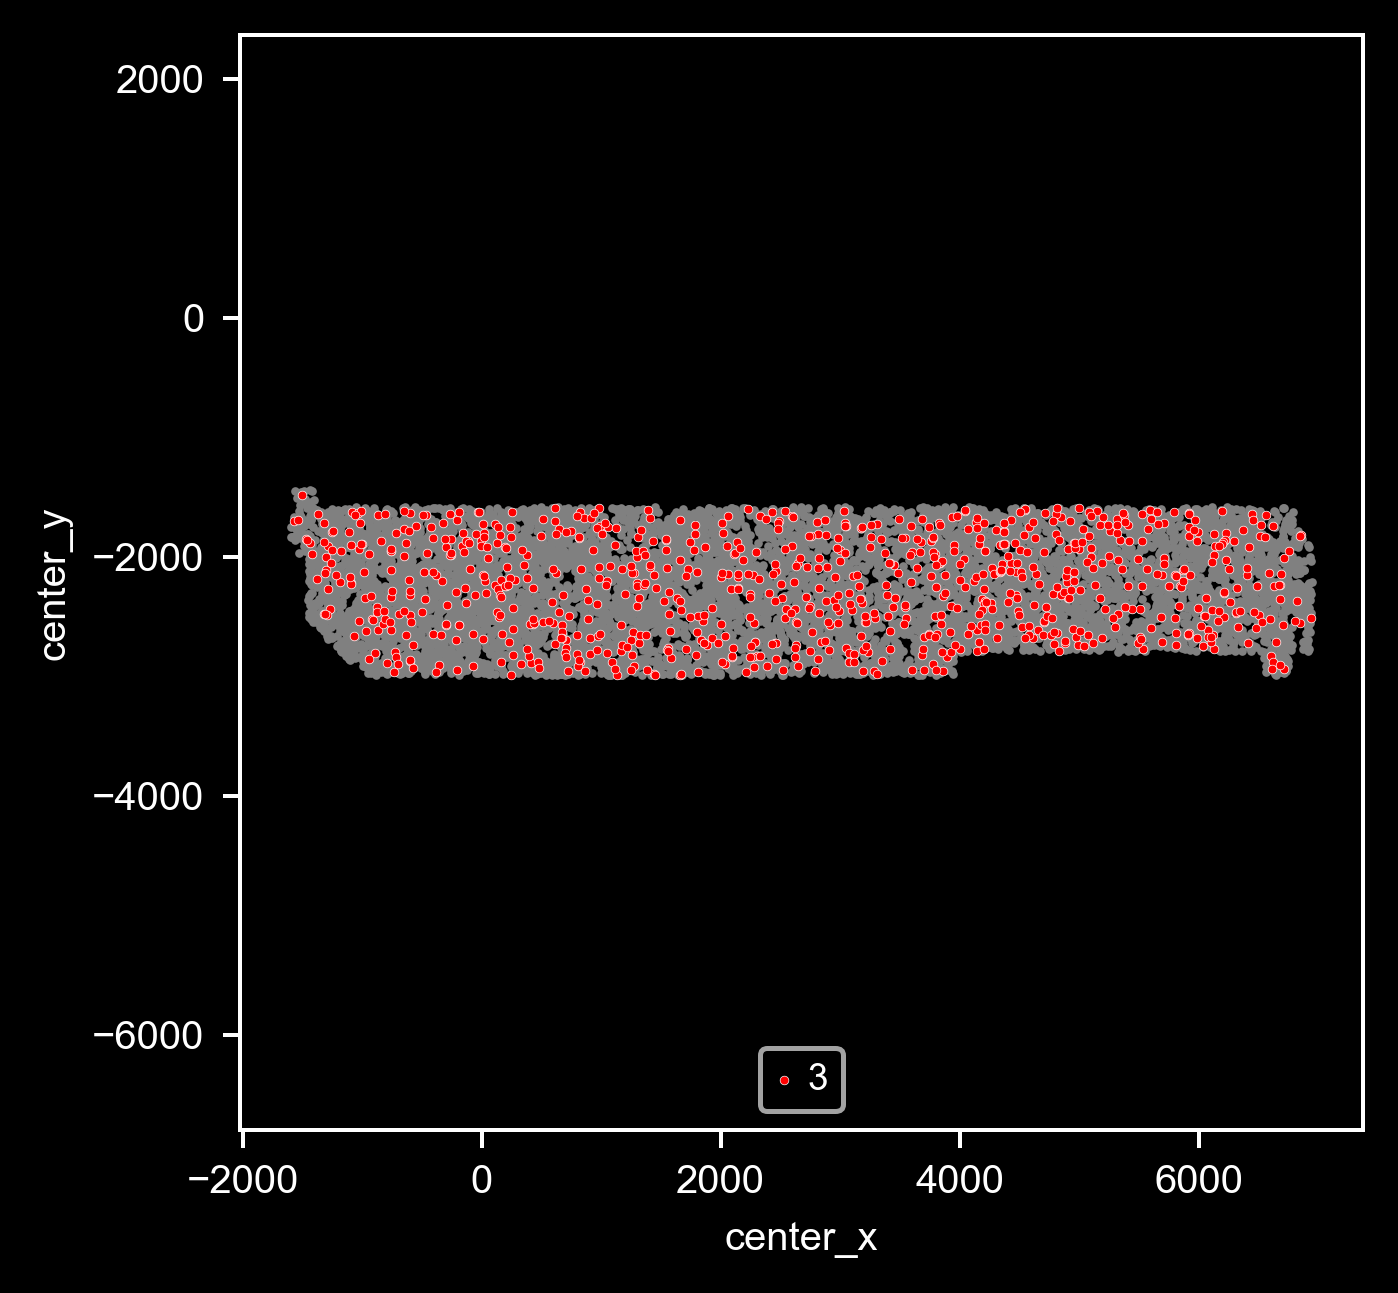

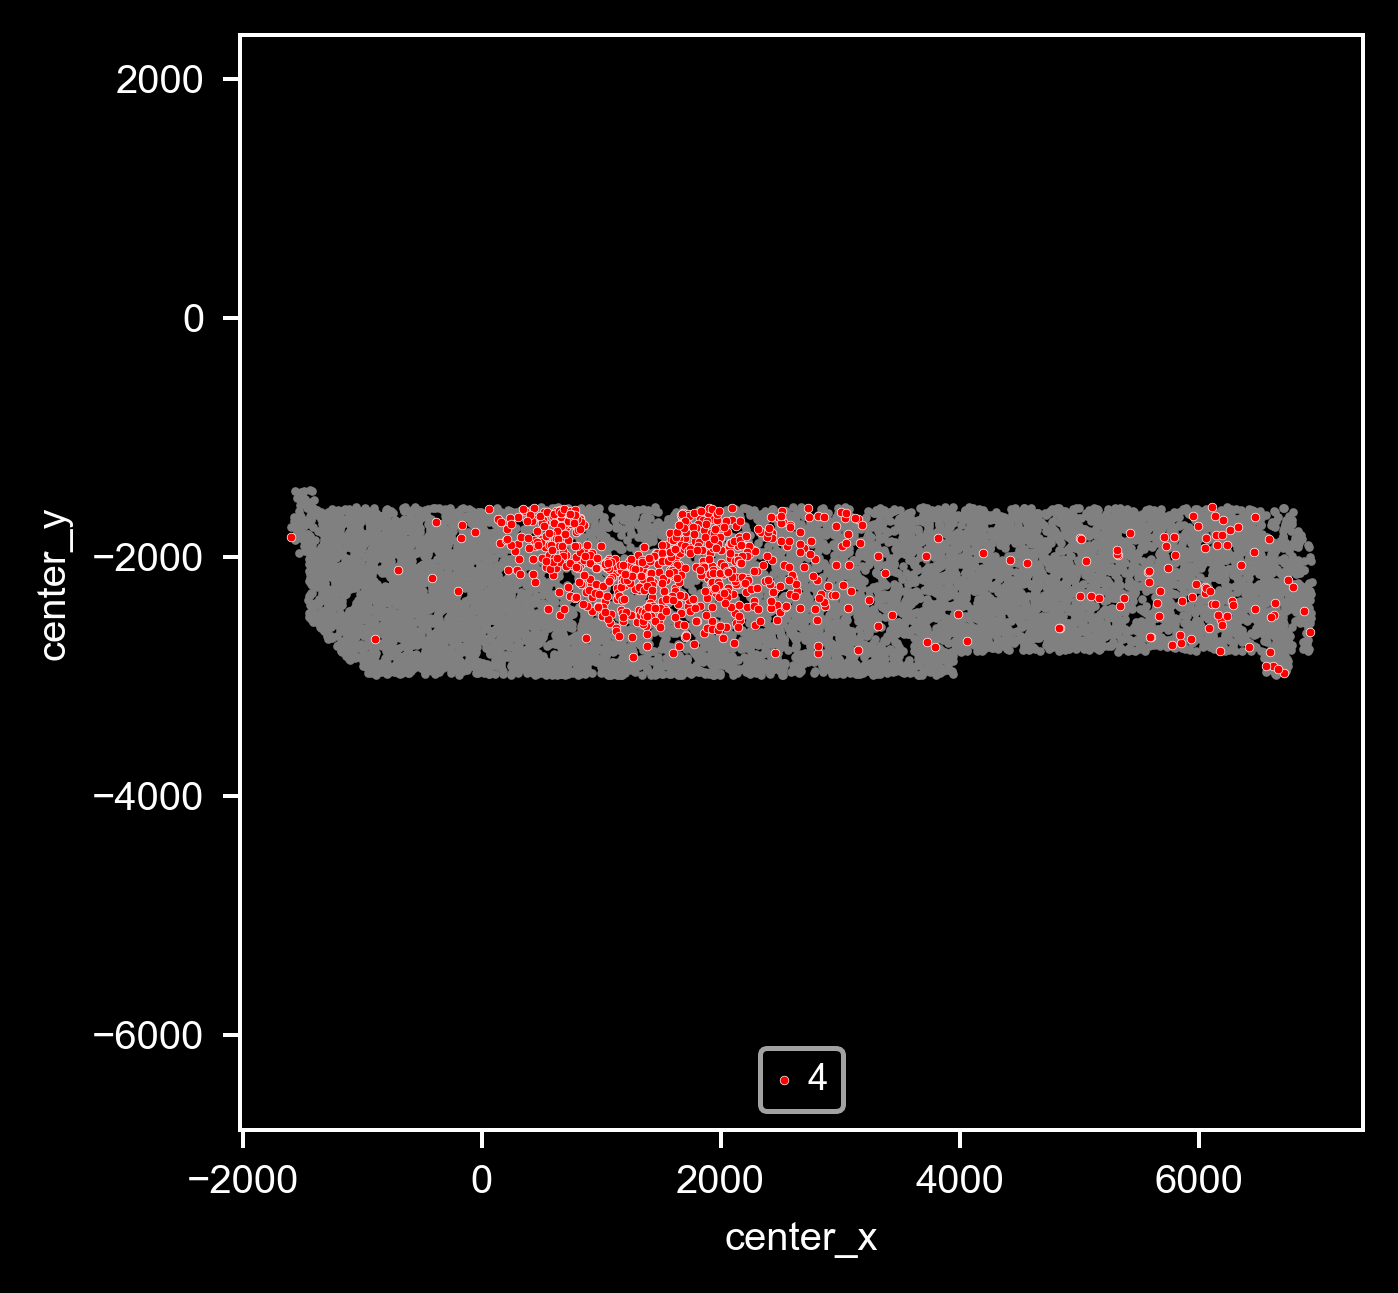

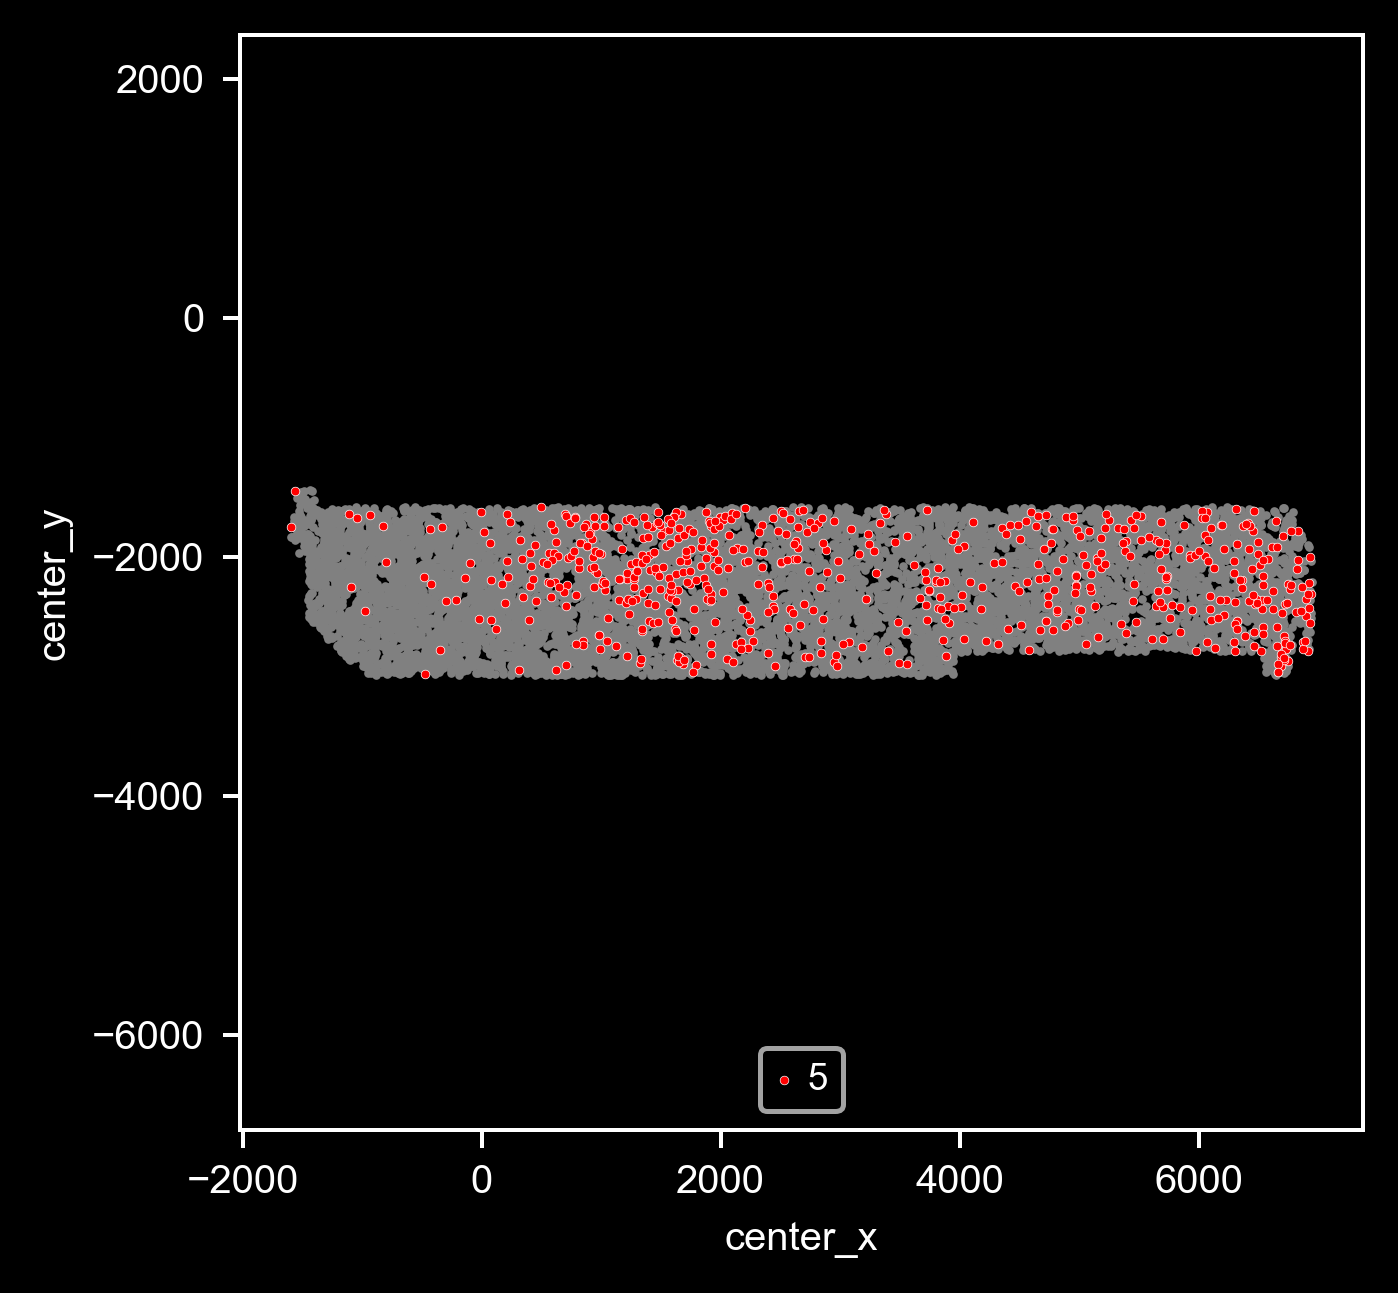

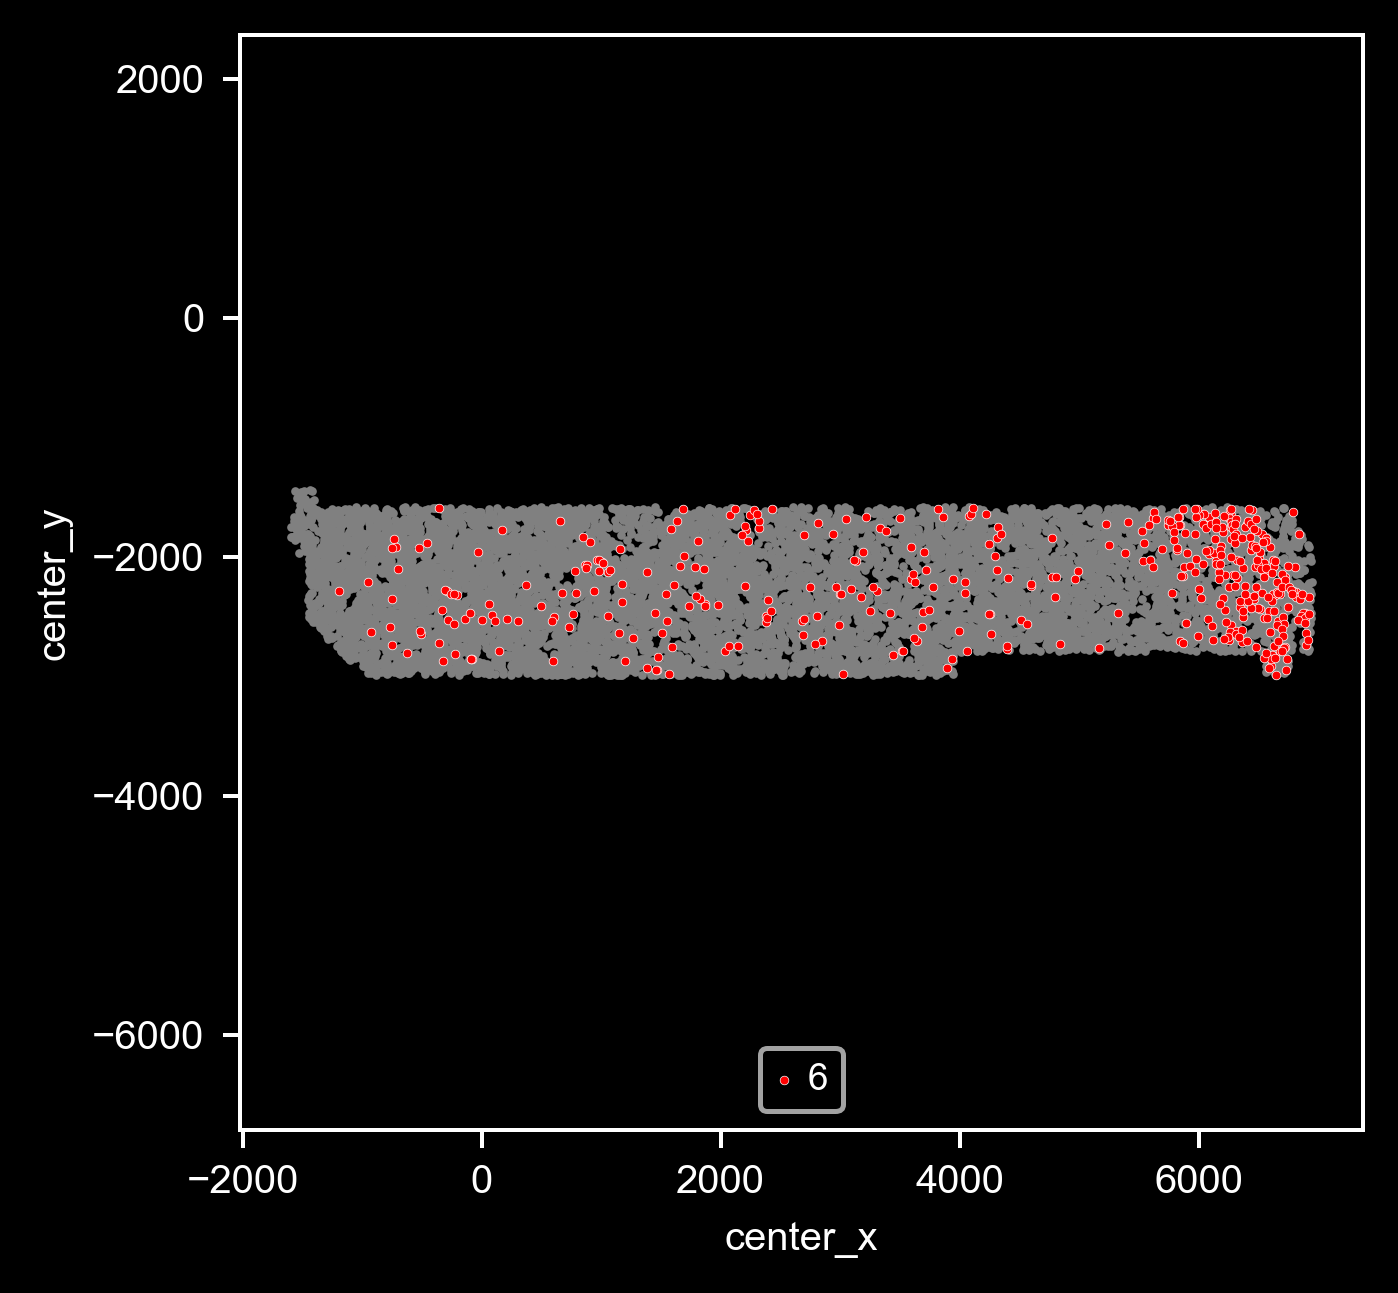

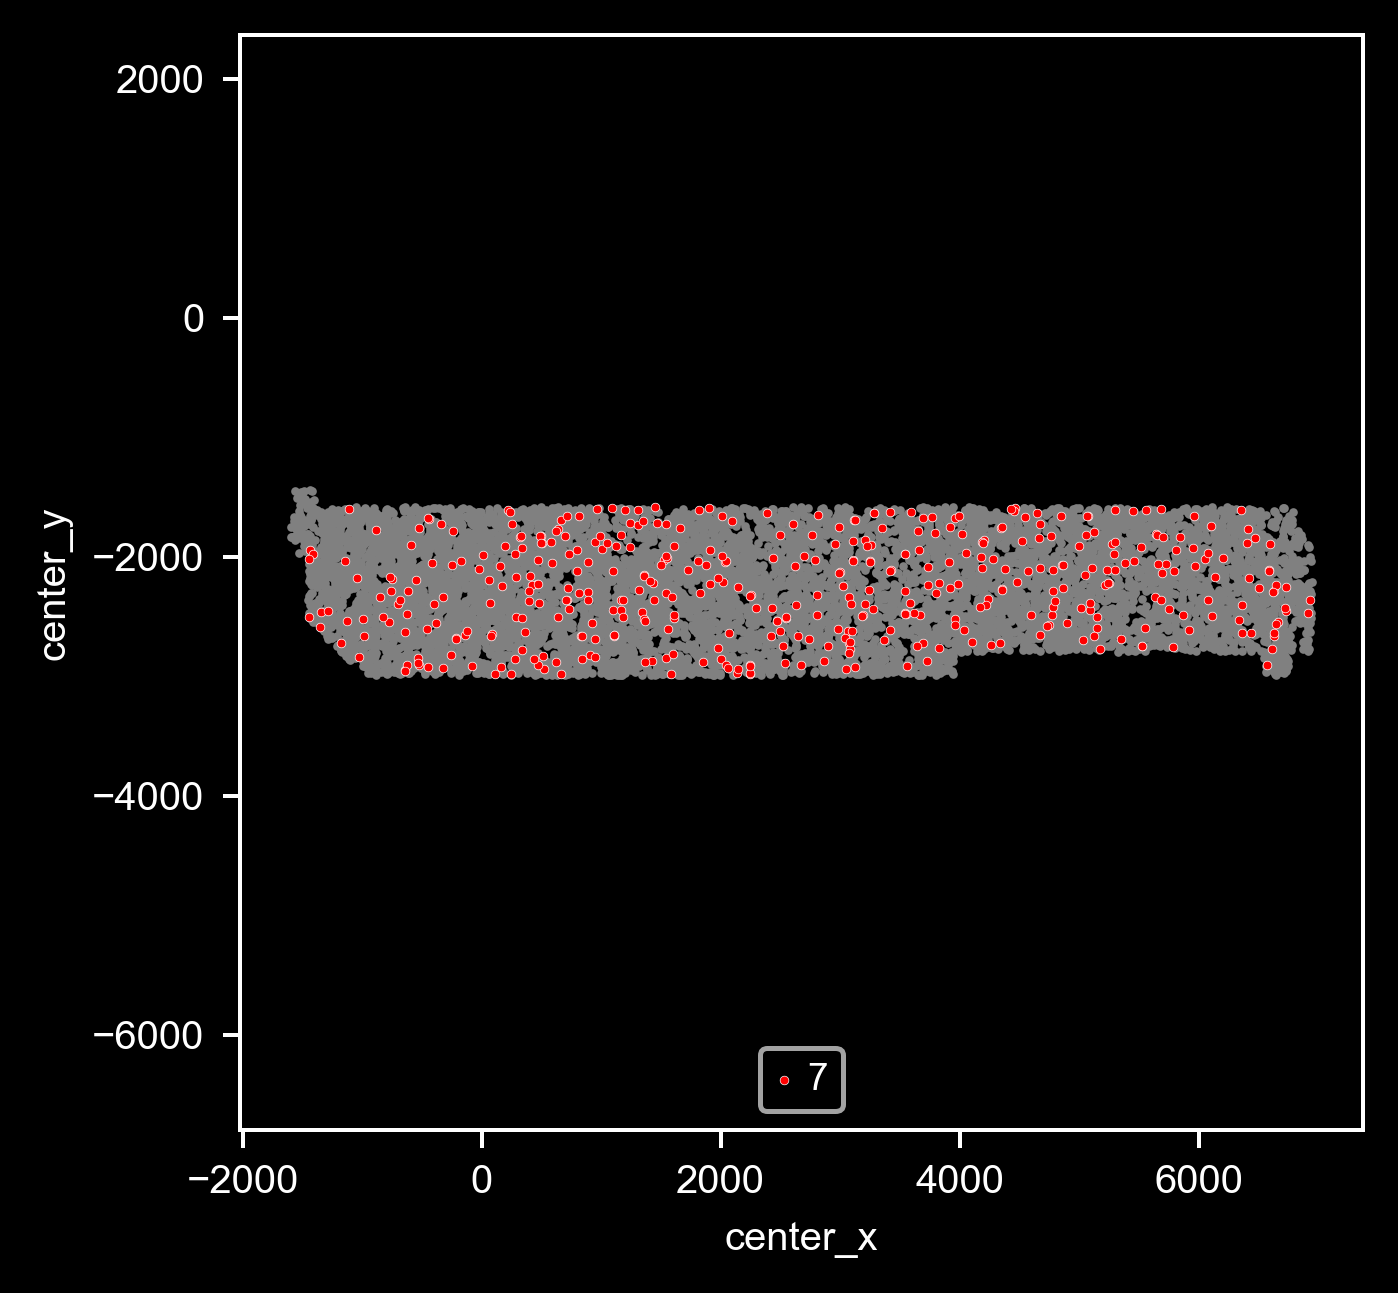

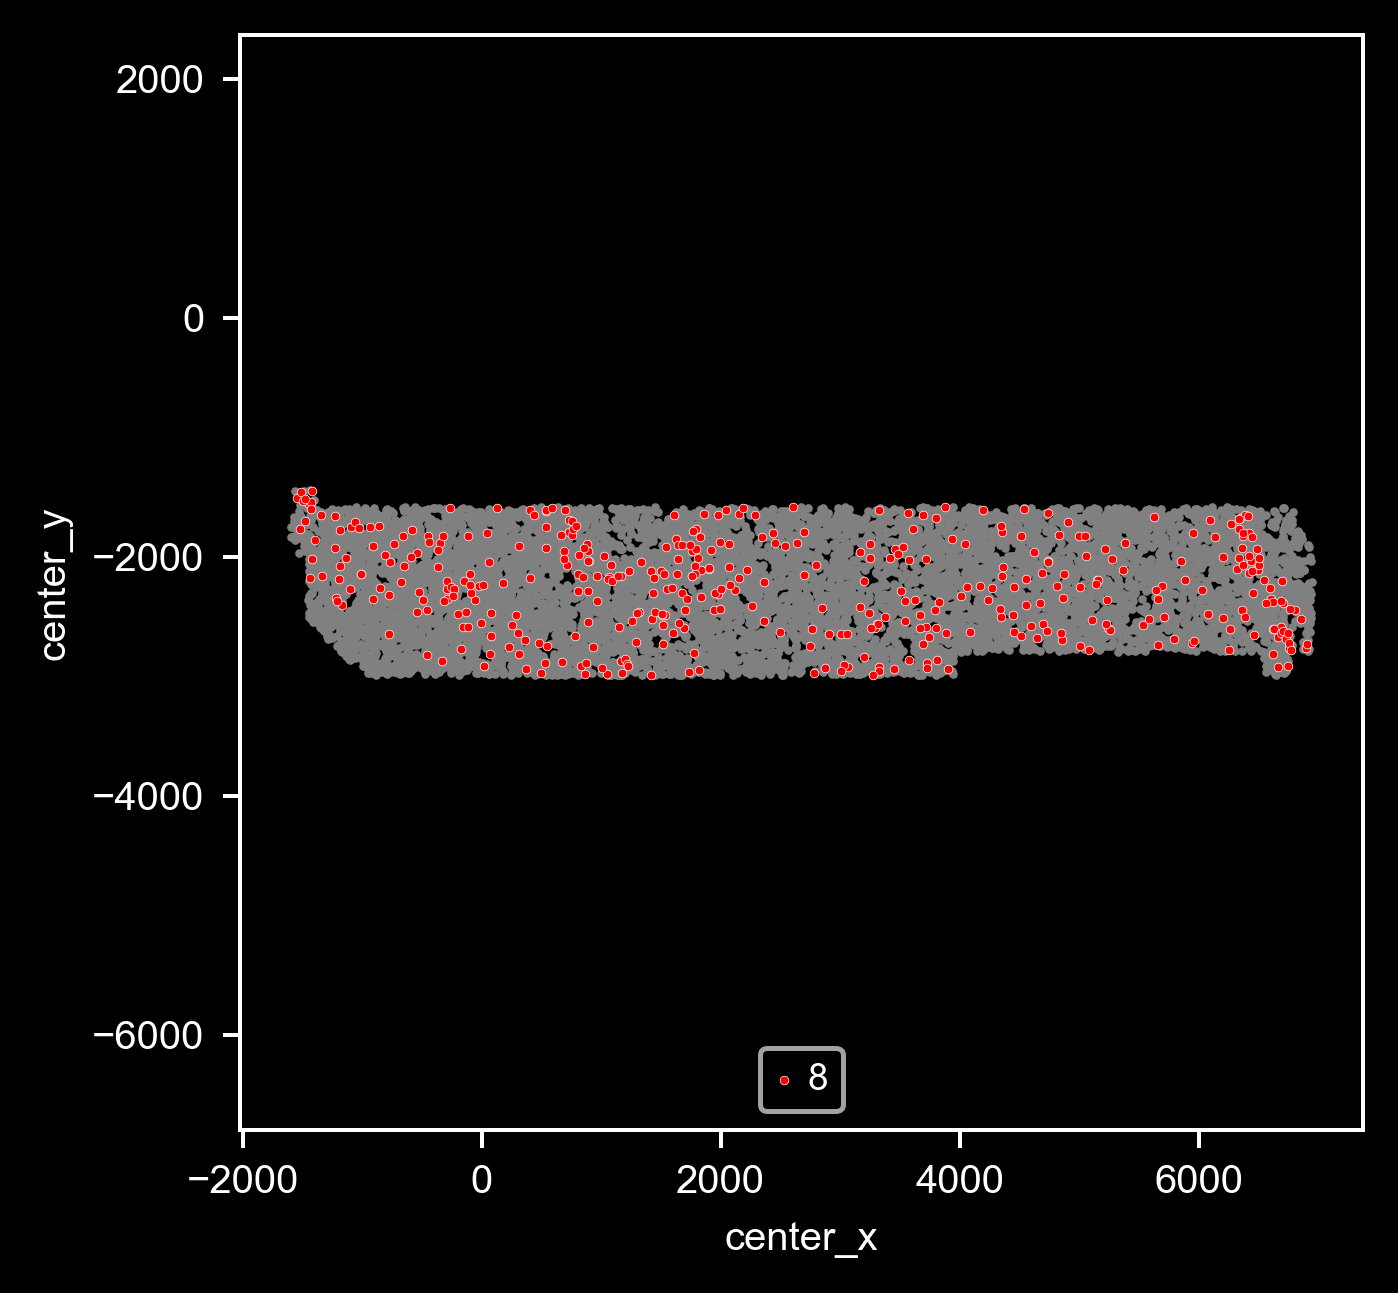

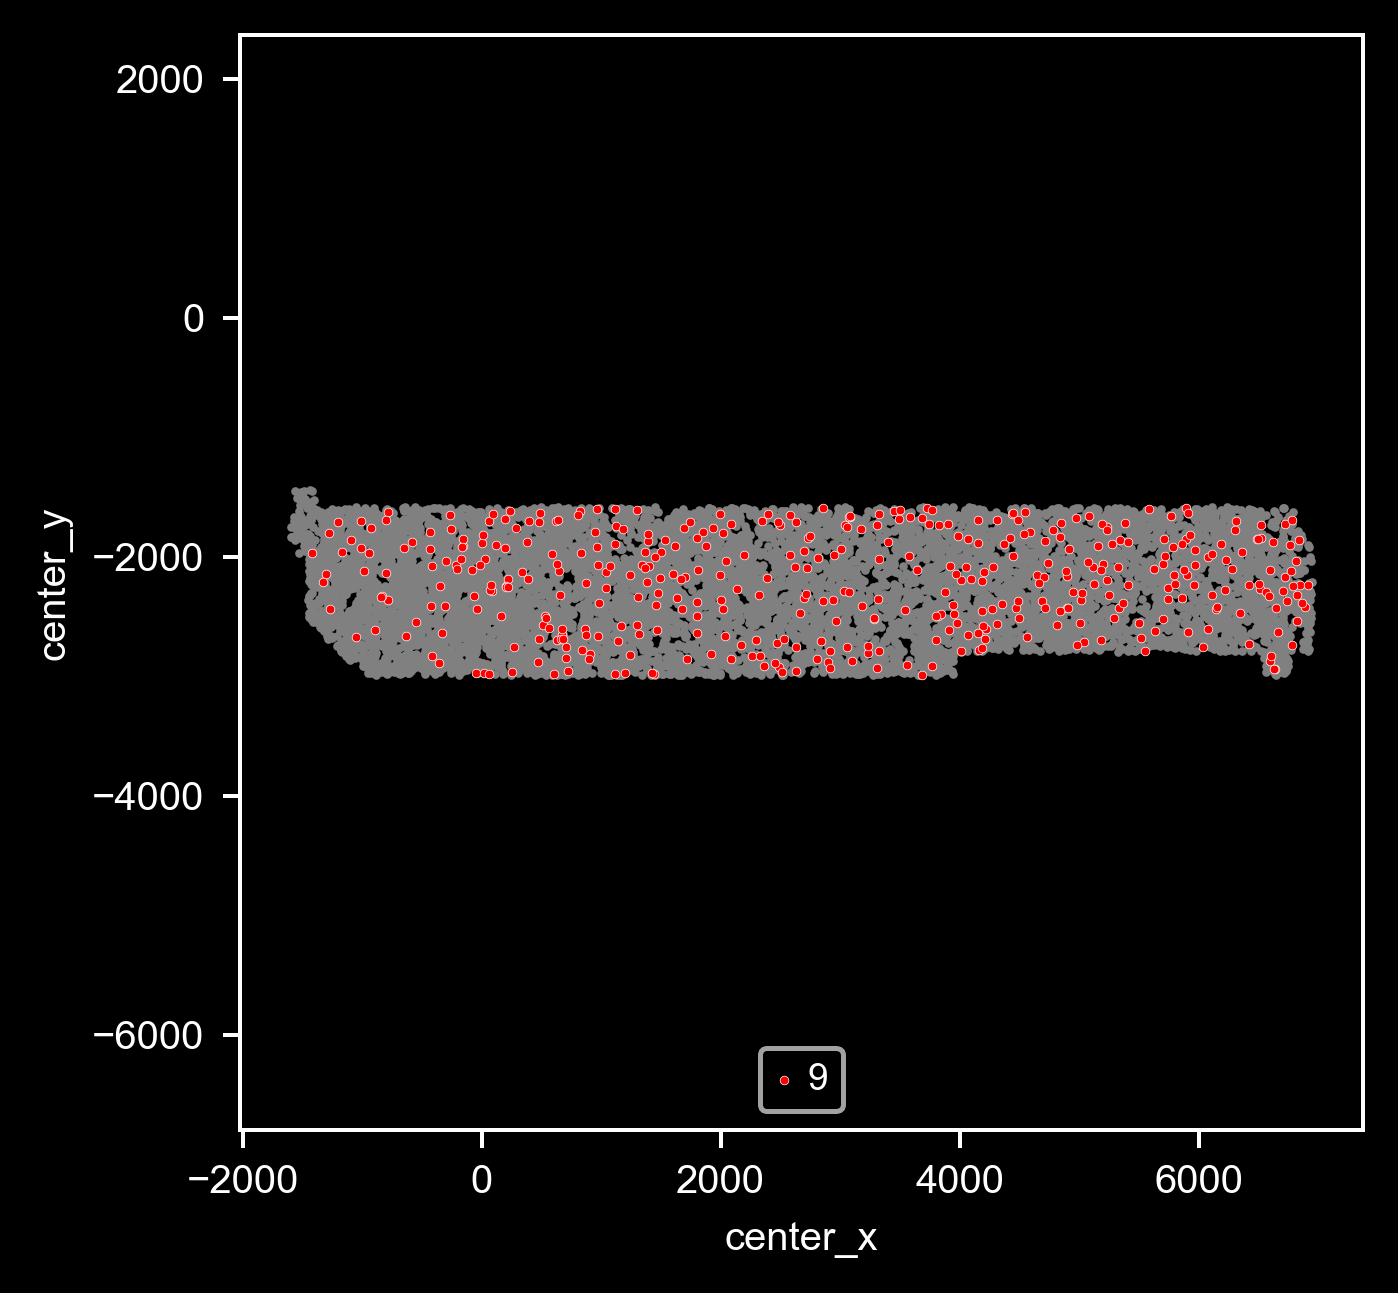

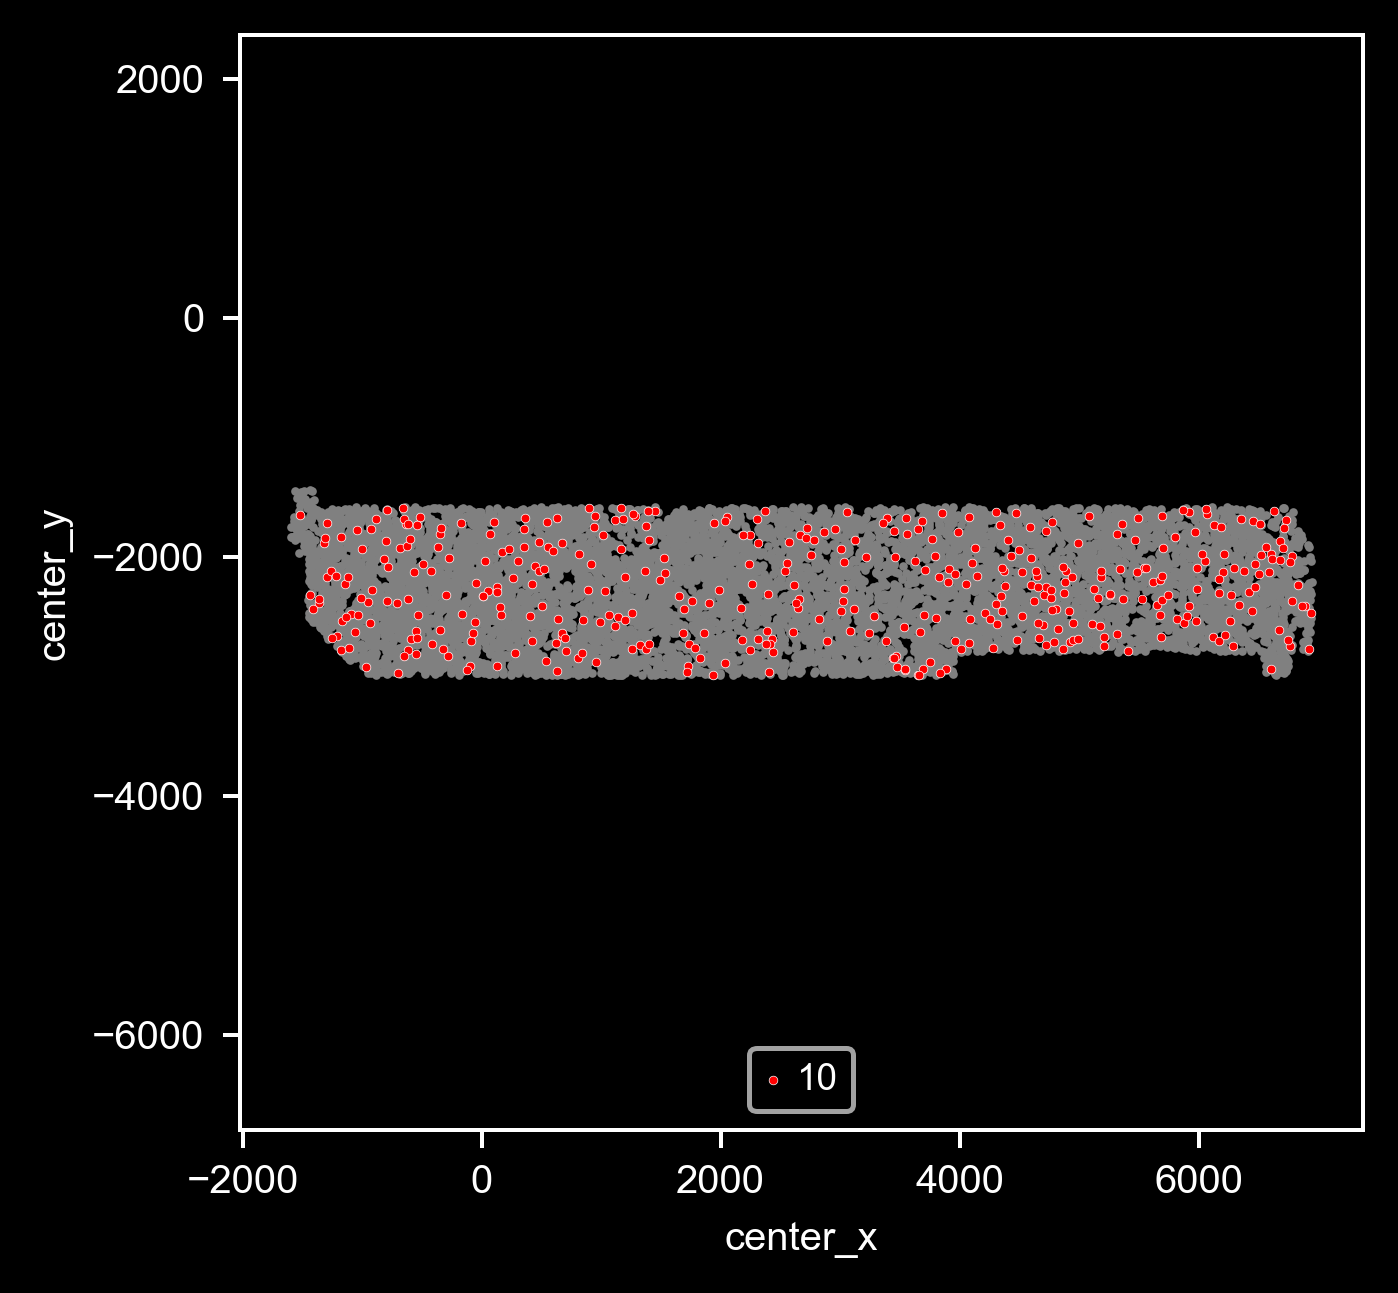

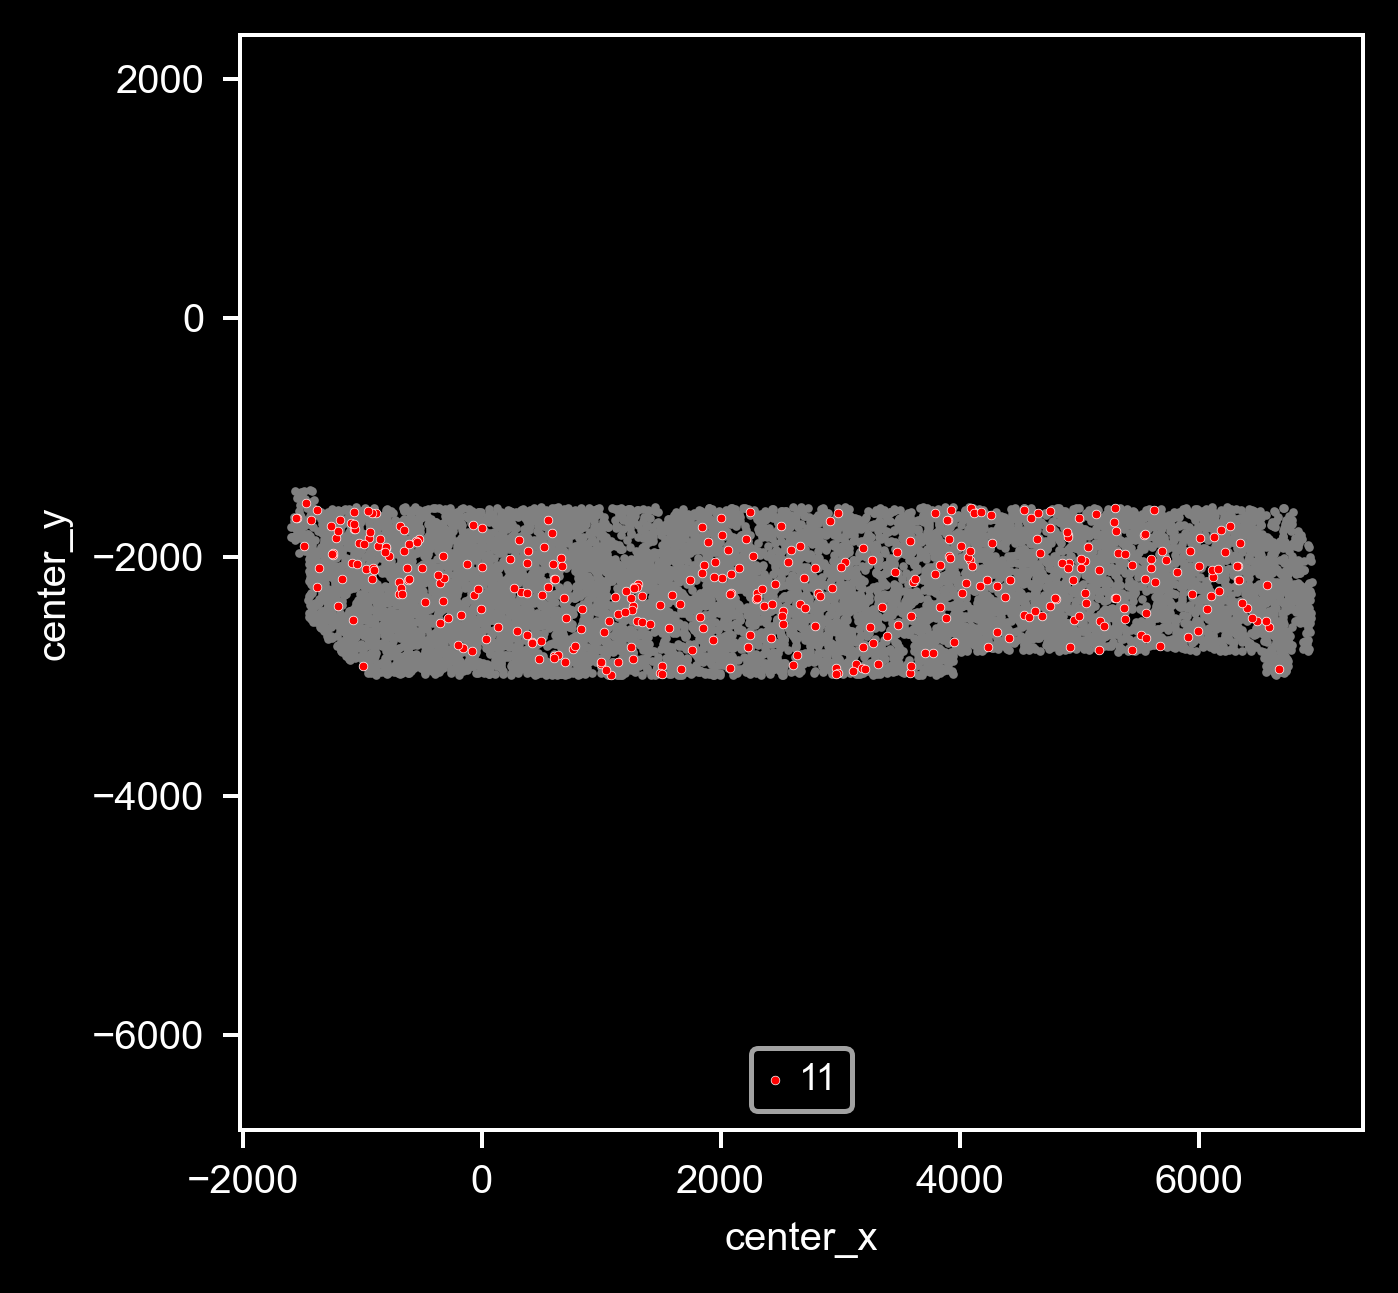

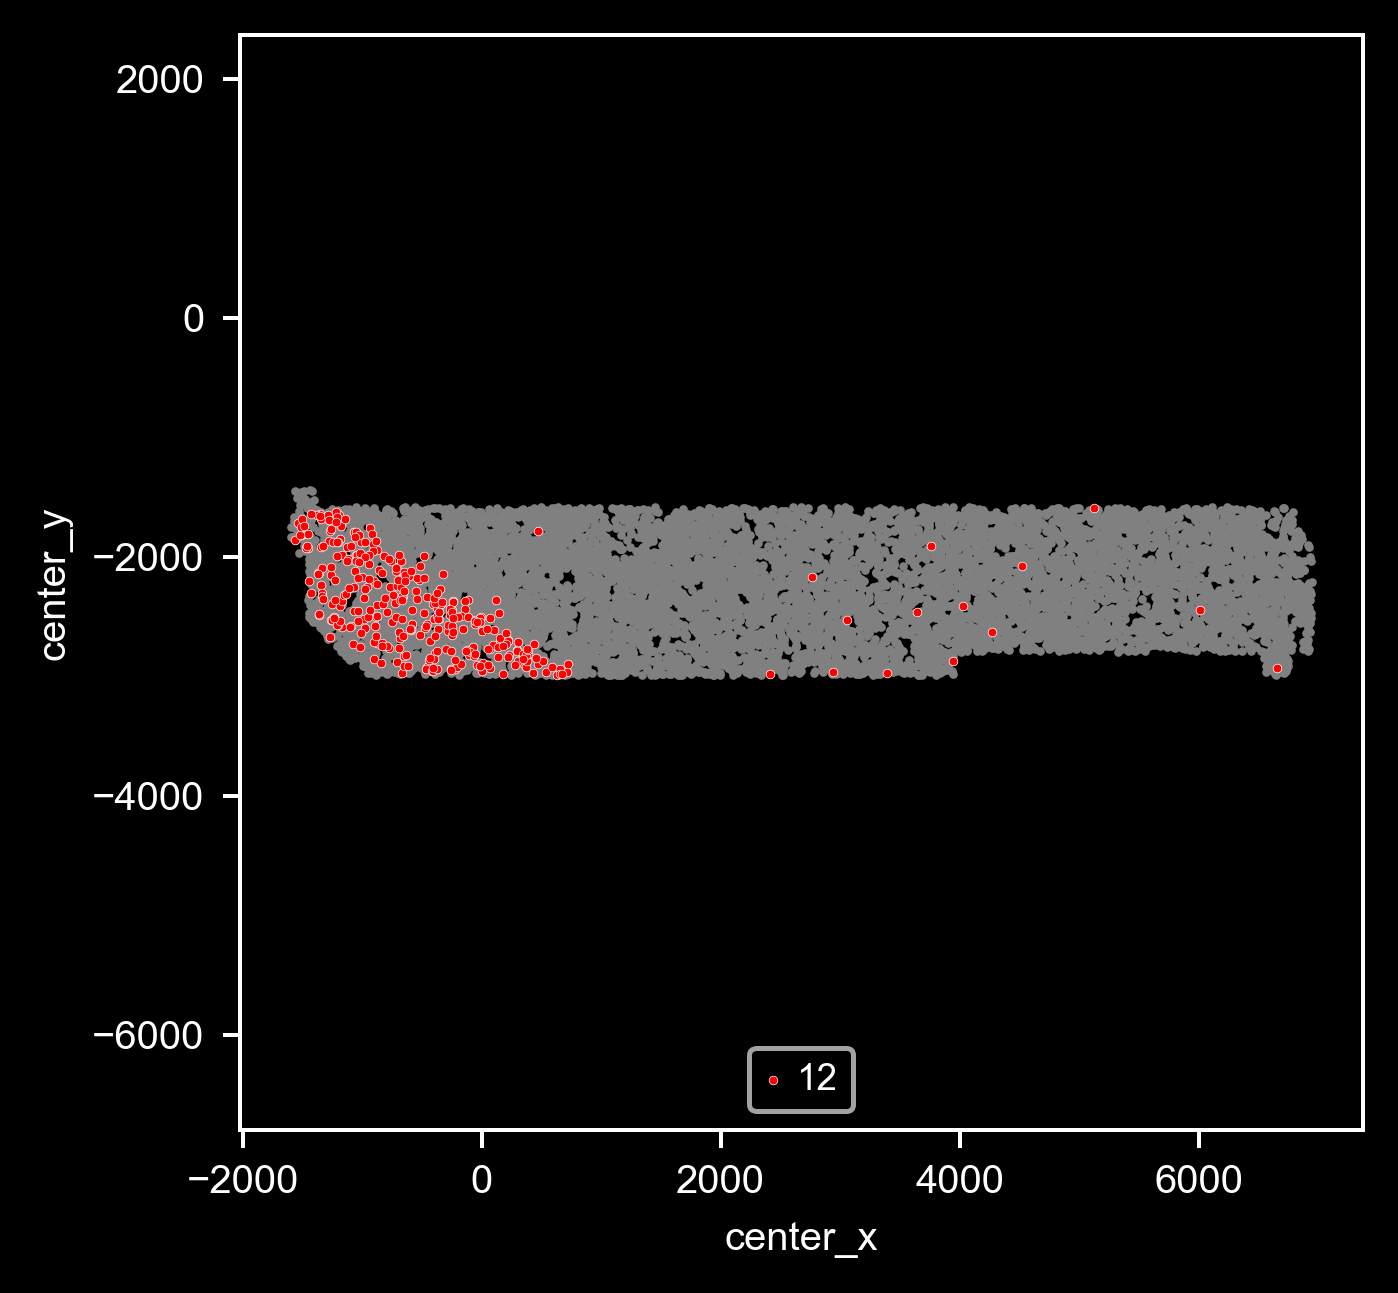

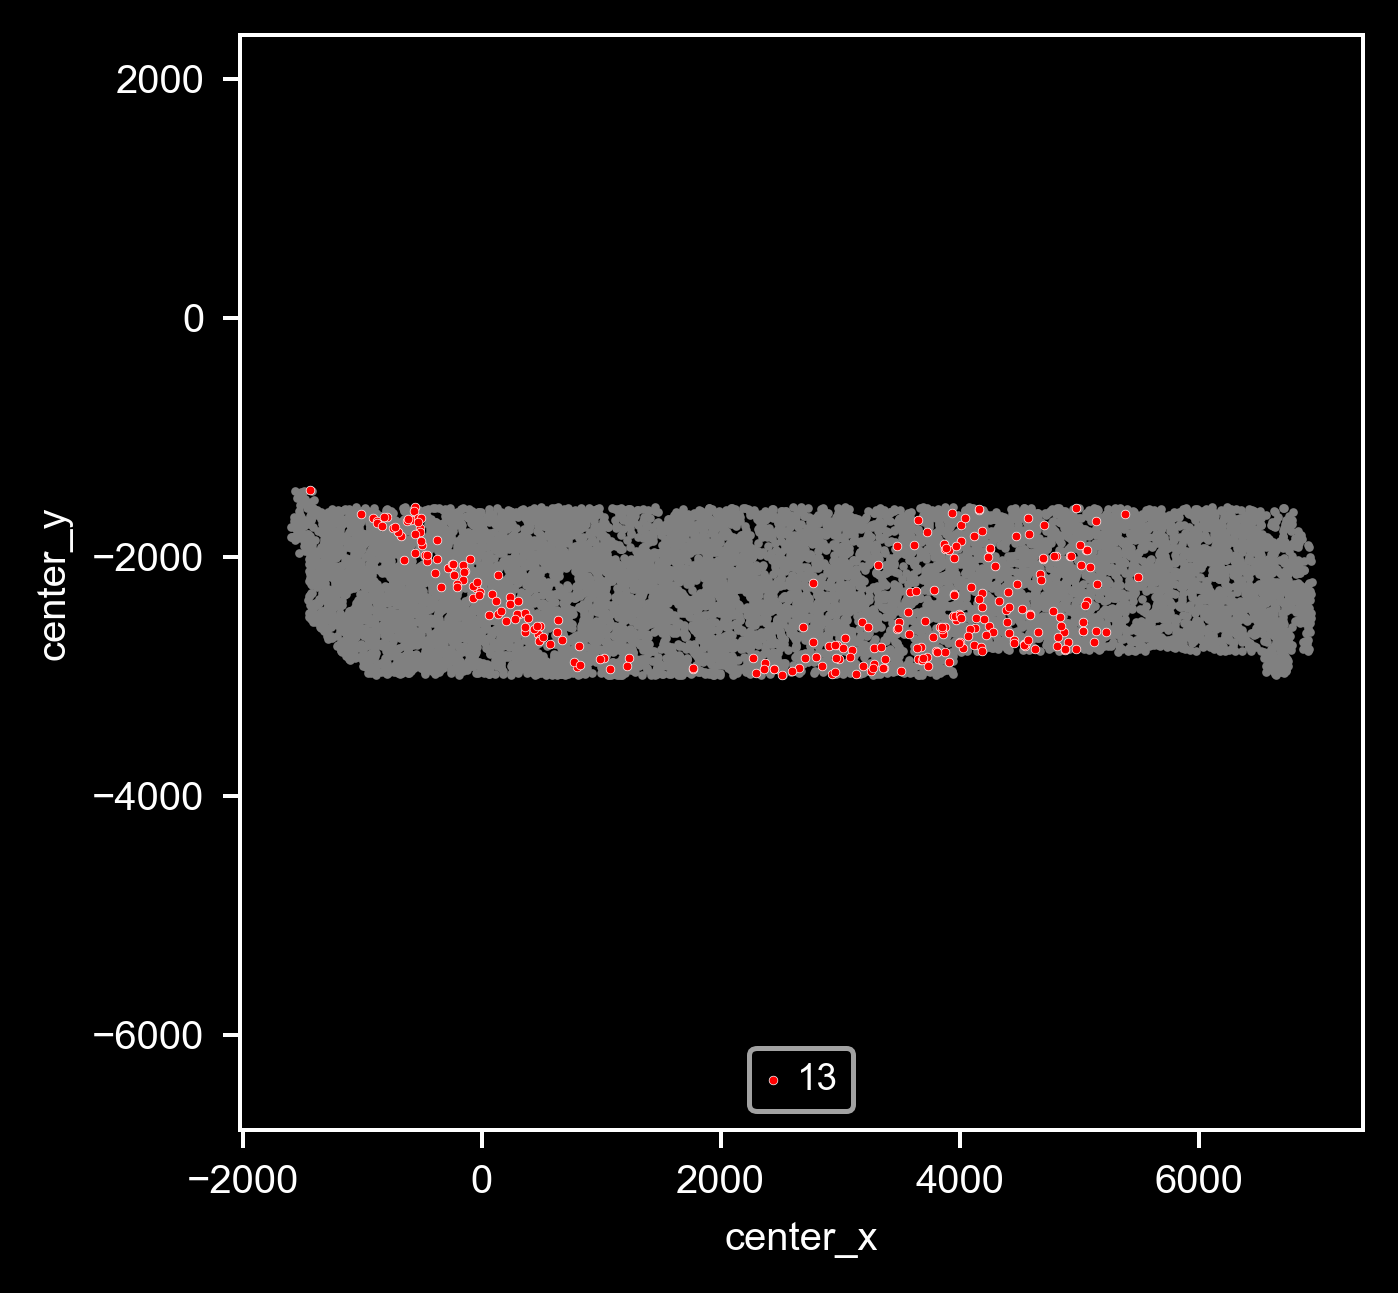

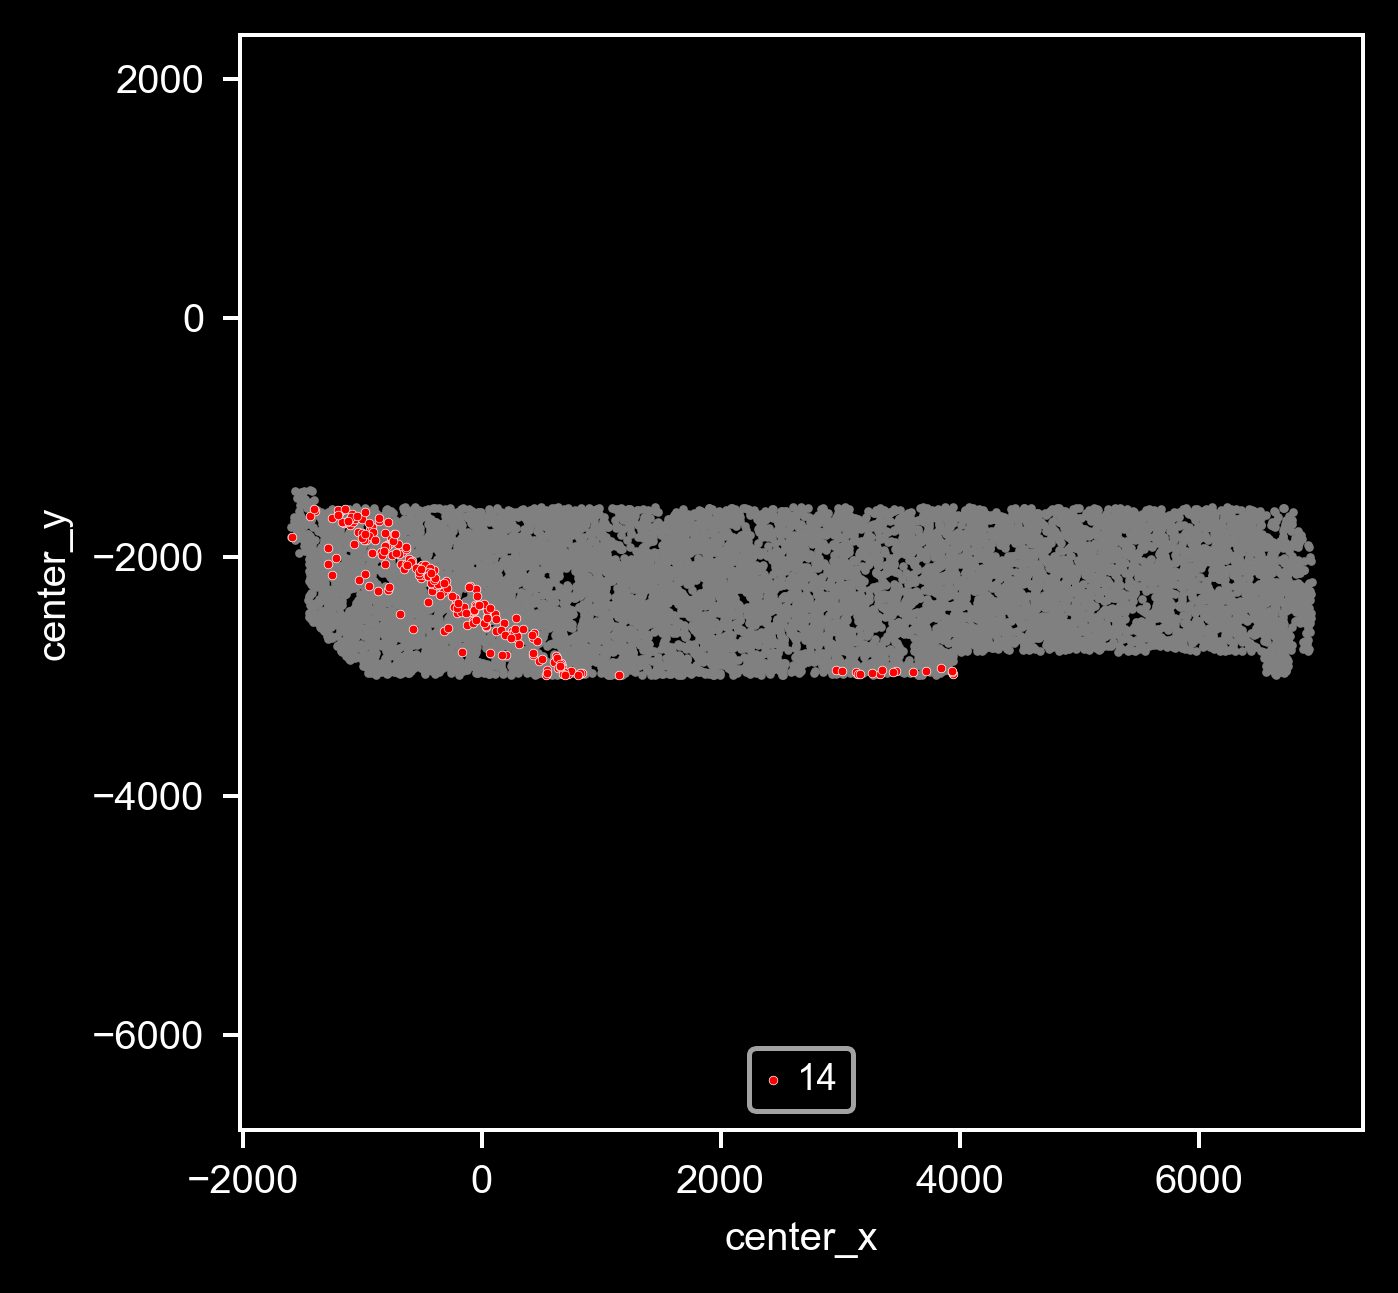

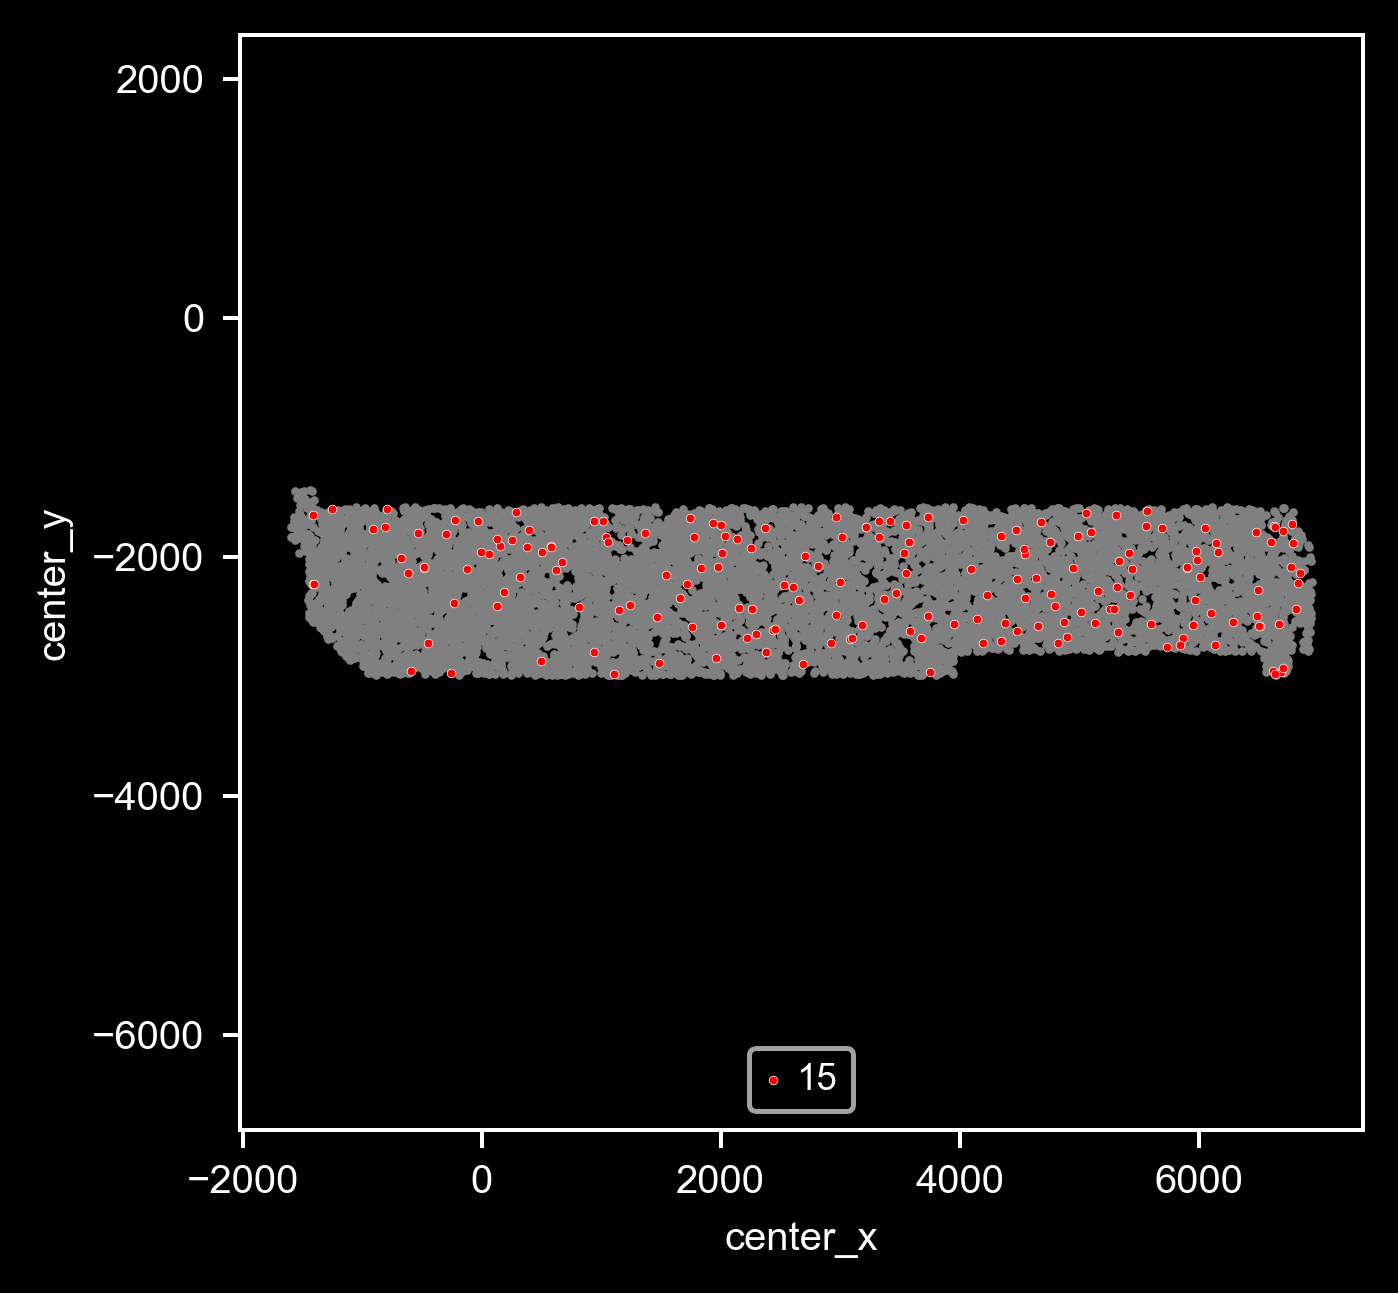

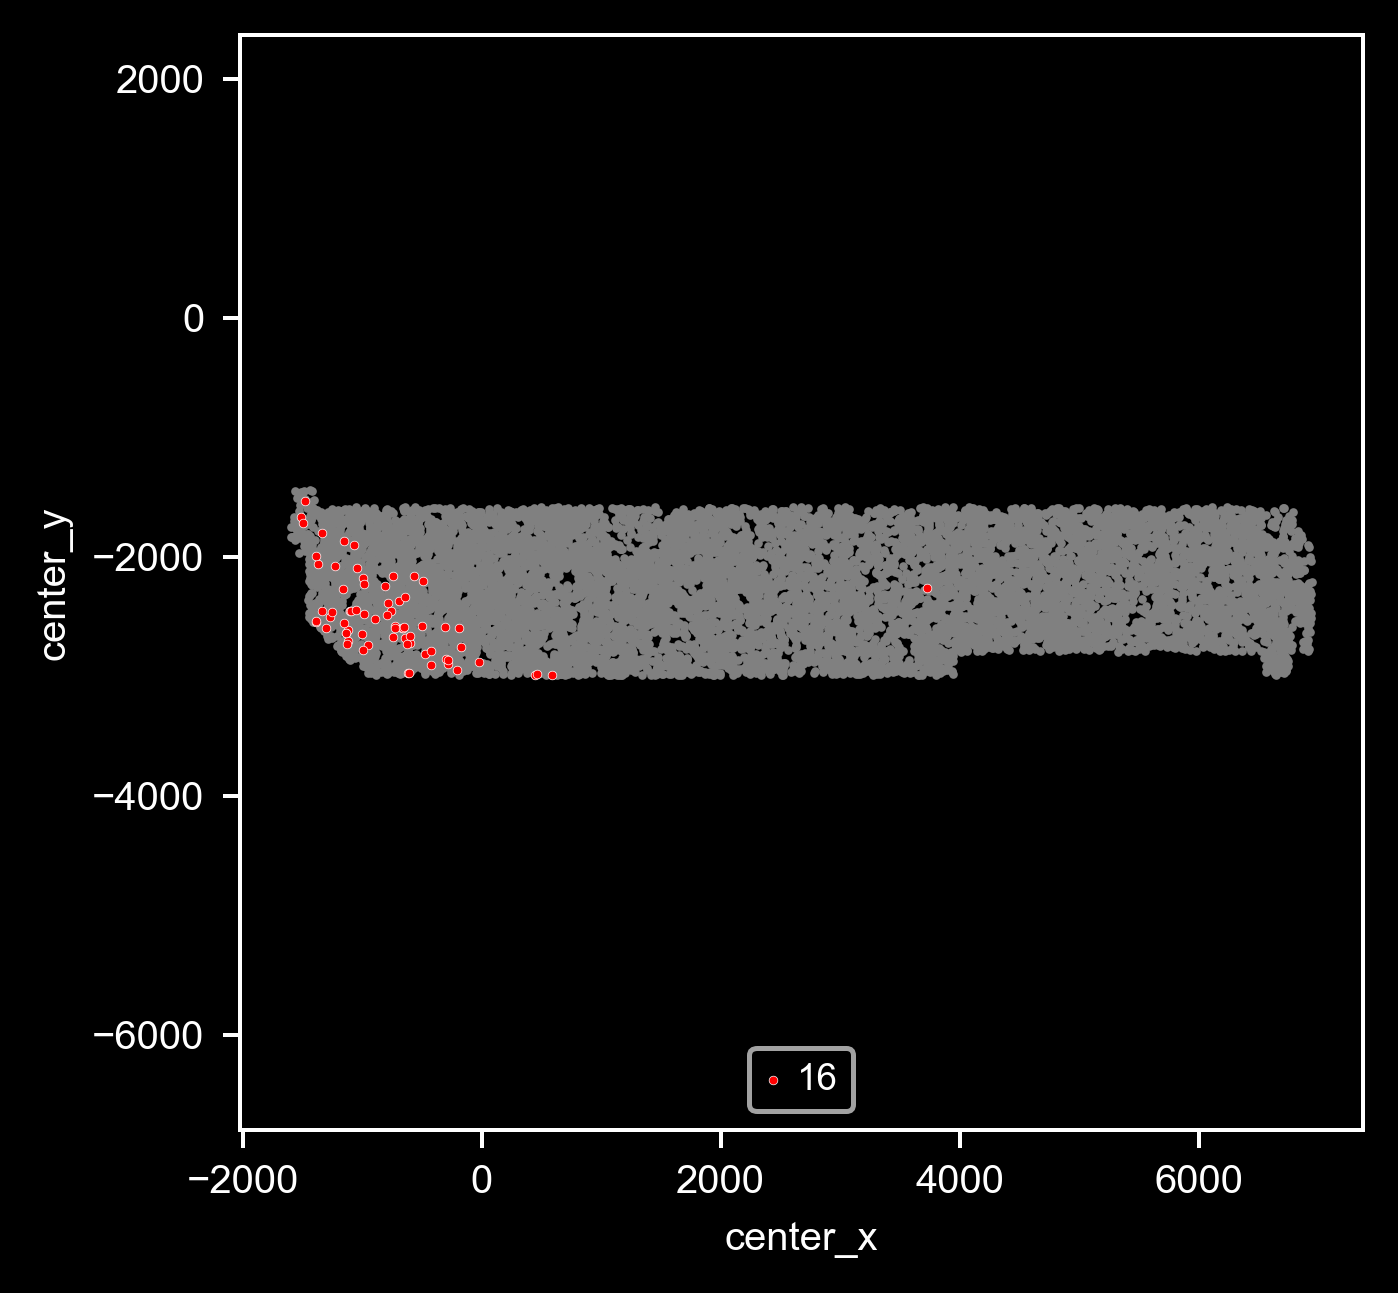

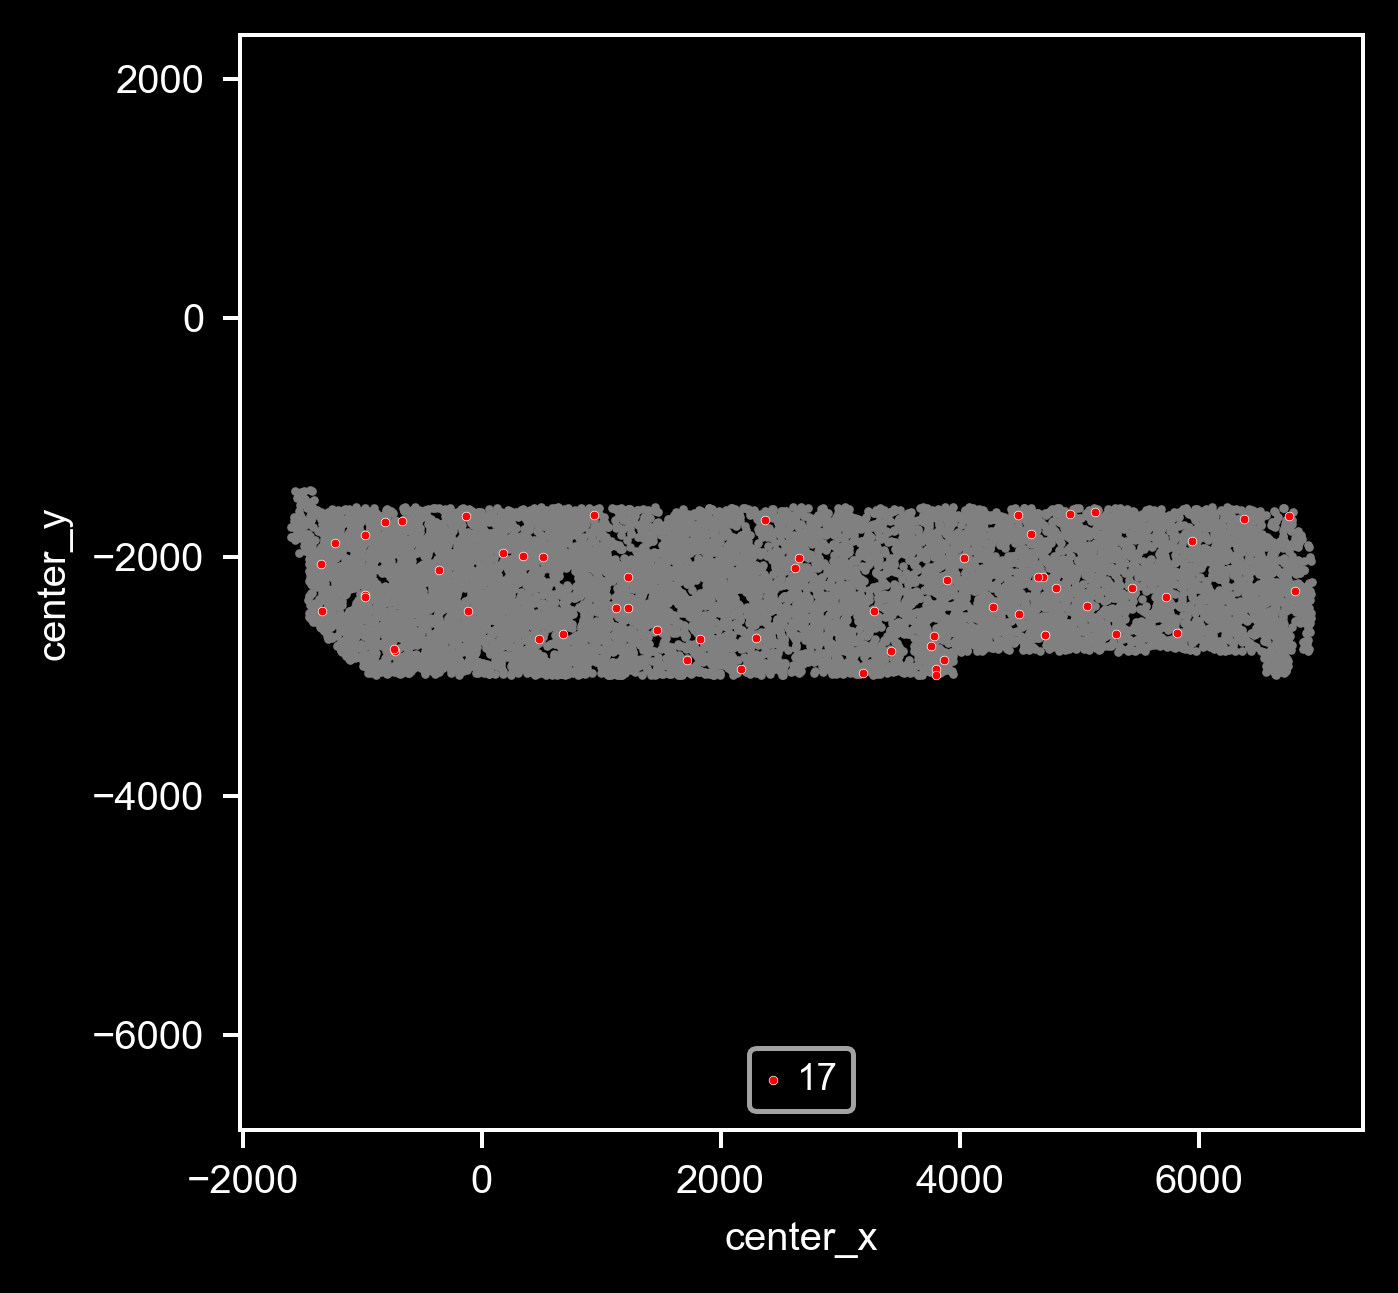

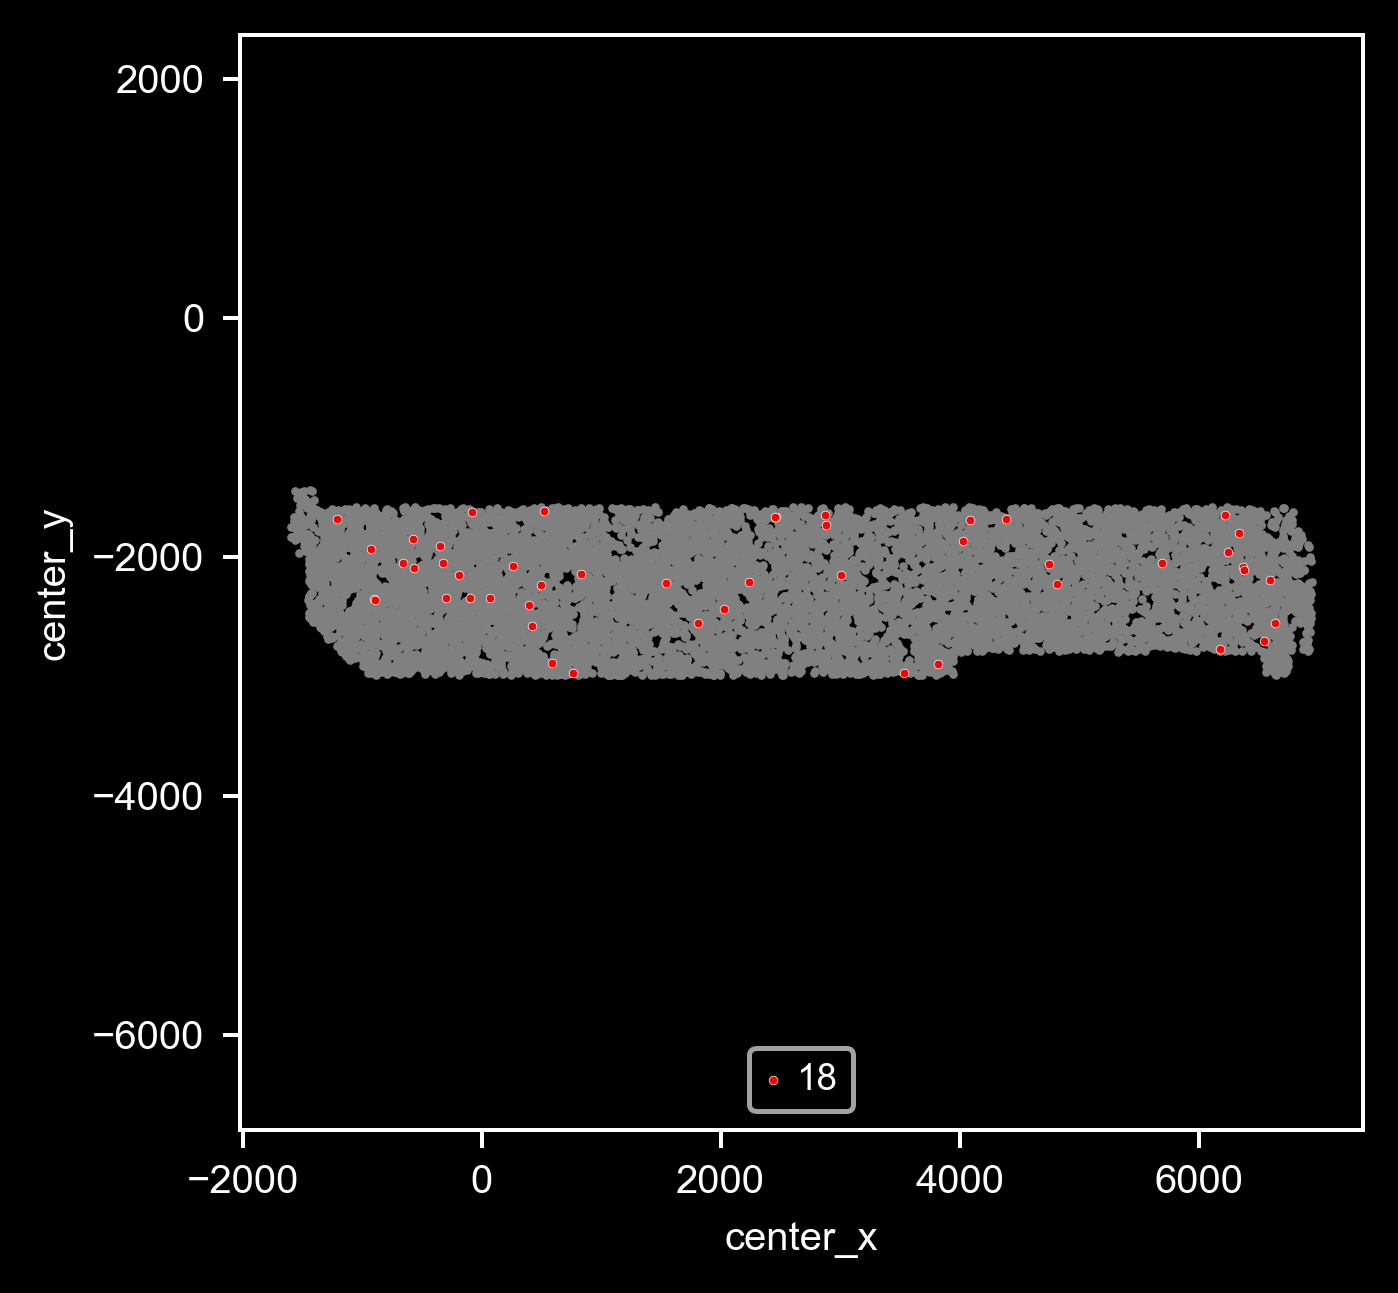

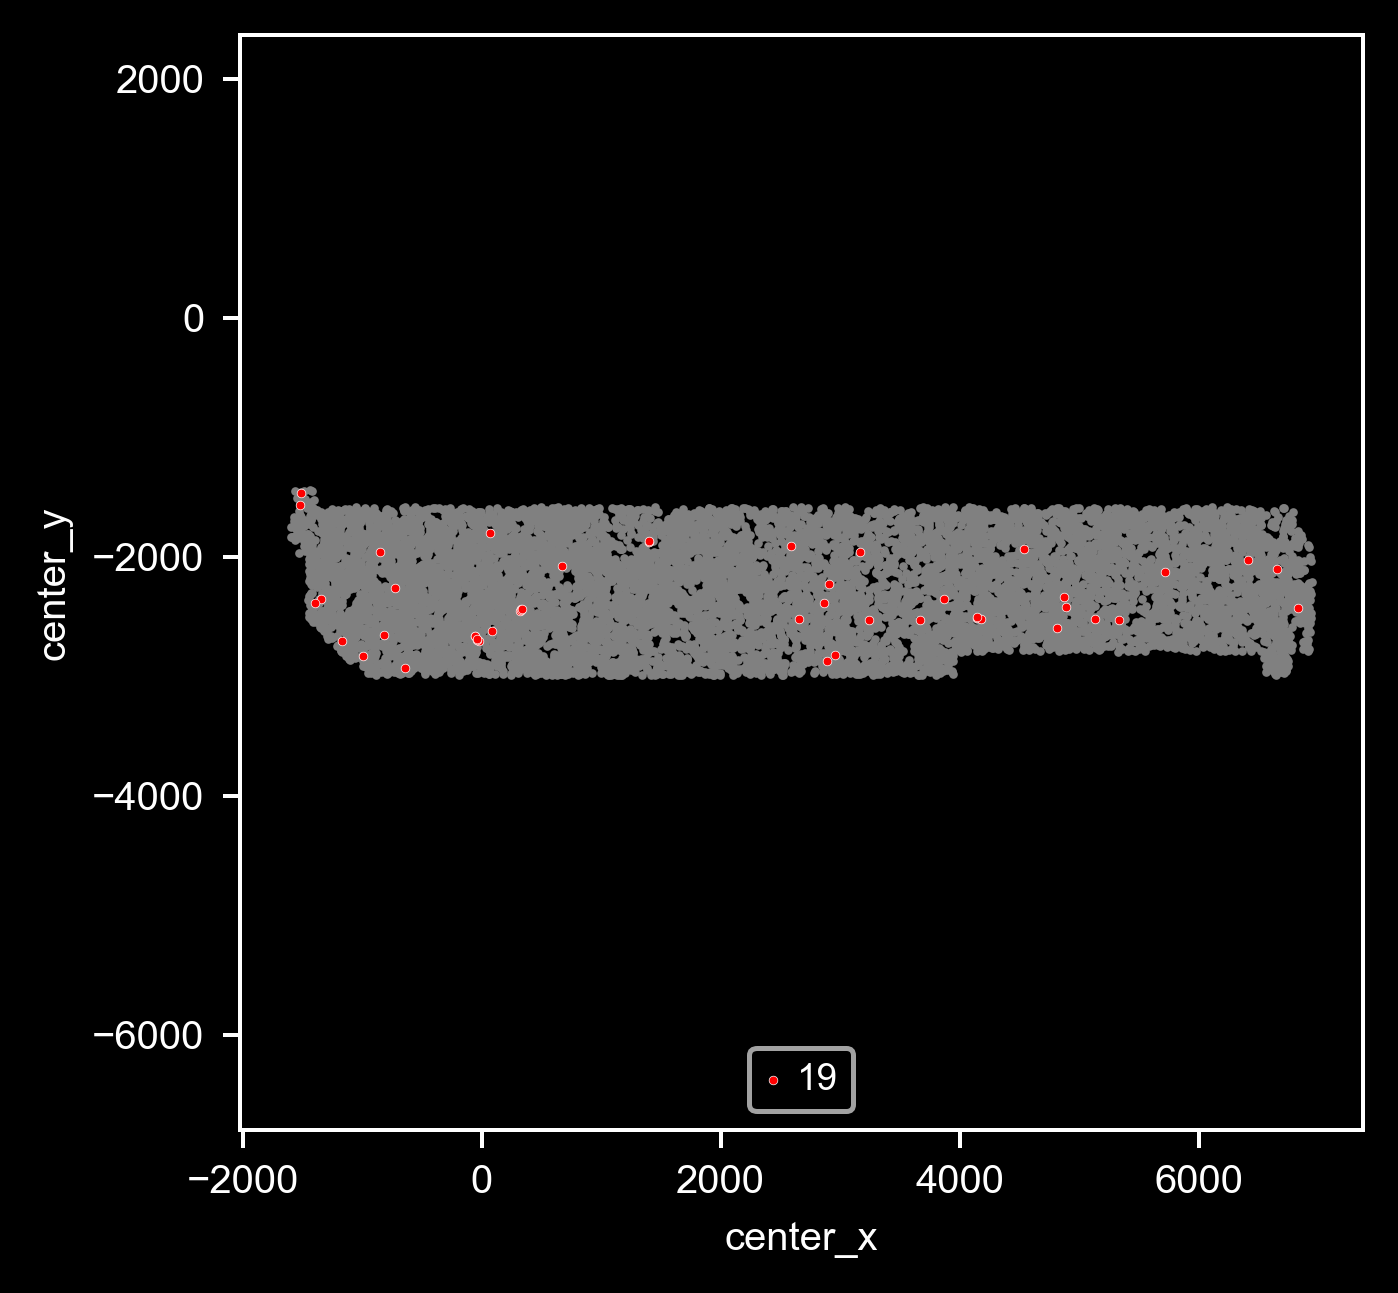

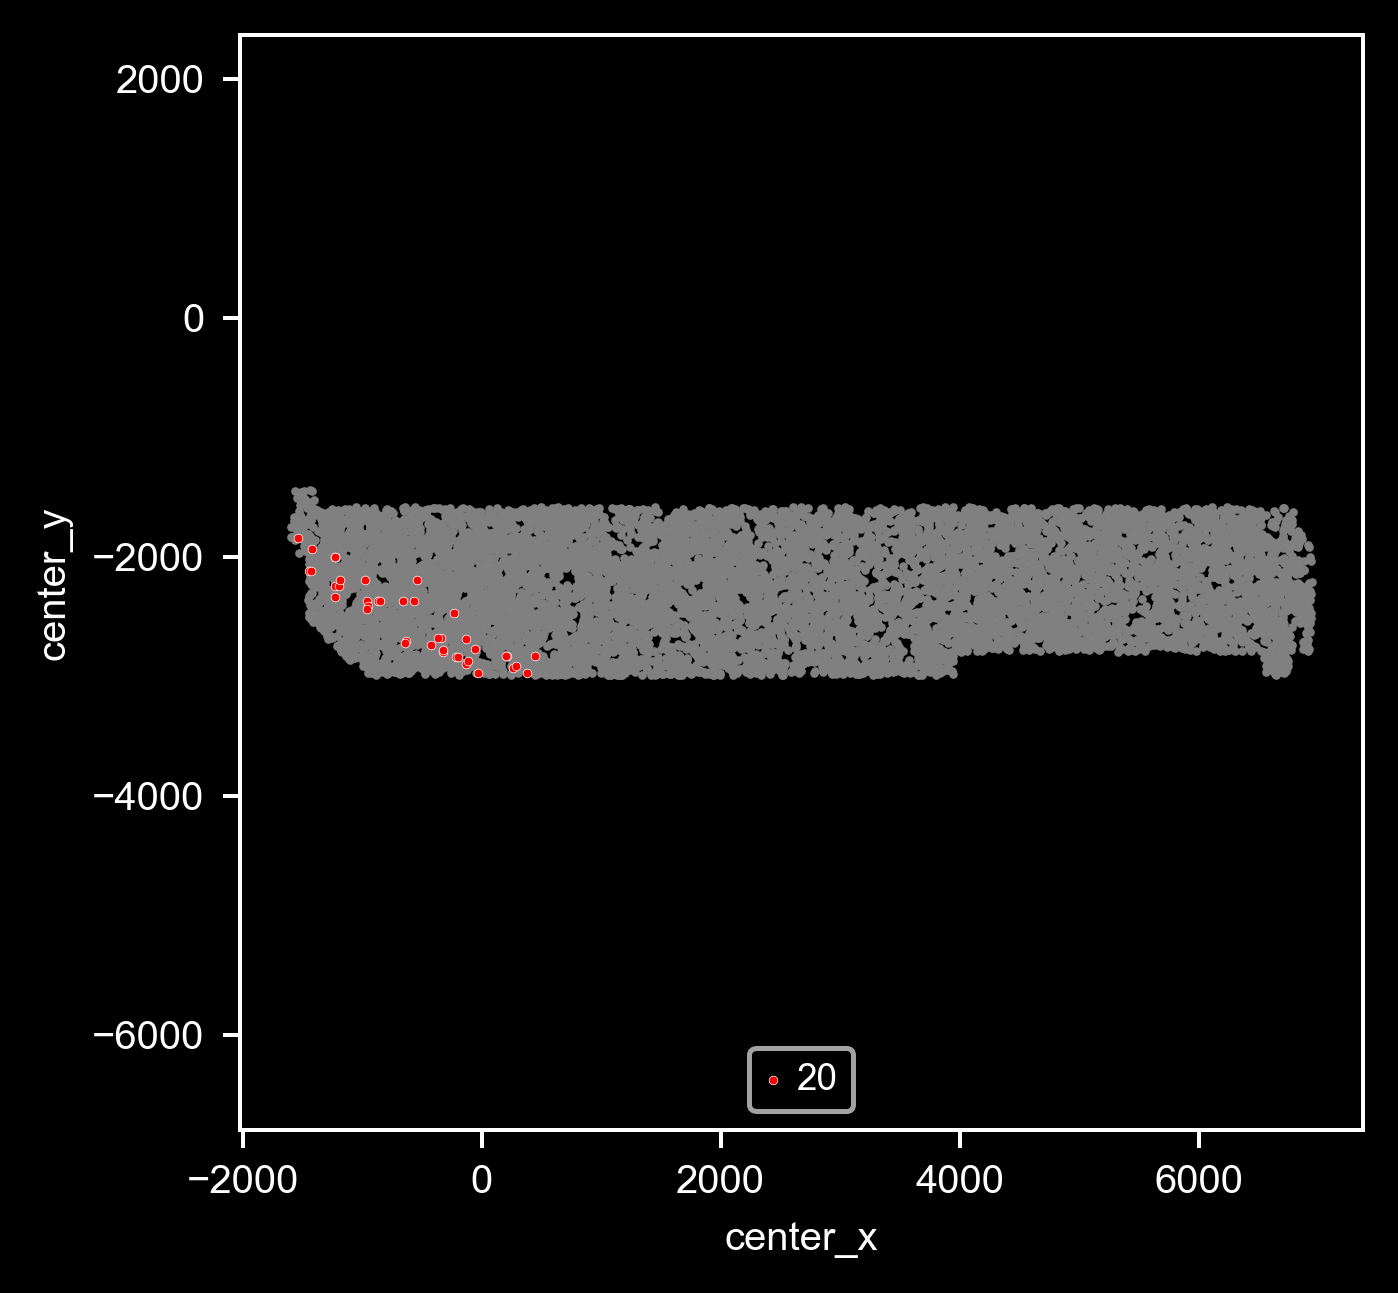

In [106]:
# visualzie the spatial dist for clusters
import matplotlib.pyplot as plt
for _class in sorted(np.unique(adata.obs['leiden_cluster']), key=lambda v:int(v)):
    #plt.style.use('dark_background')
    ax = sns.scatterplot(data=adata.obs, x='center_x', y='center_y', 
                    color='grey', s=3, legend=True, linewidth=0)
    ax = sns.scatterplot(data=adata.obs.loc[adata.obs['leiden_cluster']==_class], 
                         x='center_x', y='center_y', 
                    color='r', s=3, legend=True, label=_class)
    ax.grid(False)
    plt.axis('equal')
    hs, ls = ax.get_legend_handles_labels()
    ax.legend(hs,ls, ncol=8, loc=8)
    plt.show()

In [107]:
sc.tl.rank_genes_groups(adata, groupby='leiden_cluster', method='t-test')
#sc.pl.rank_genes_groups(adata, groupby='leiden_cluster')

E:\Users\puzheng\AppData\anaconda3\envs\merlin_postanalysis\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
E:\Users\puzheng\AppData\anaconda3\envs\merlin_postanalysis\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
E:\Users\puzheng\AppData\anaconda3\envs\merlin_postanalysis\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
E:\Users\puzheng\AppData\anaconda3\envs\merlin_postanalysis\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
E:\Users\puzheng\AppData\anaconda3\envs\merlin_postanalysis\lib\site-packages\scanpy\tools\_rank_genes_groups.py

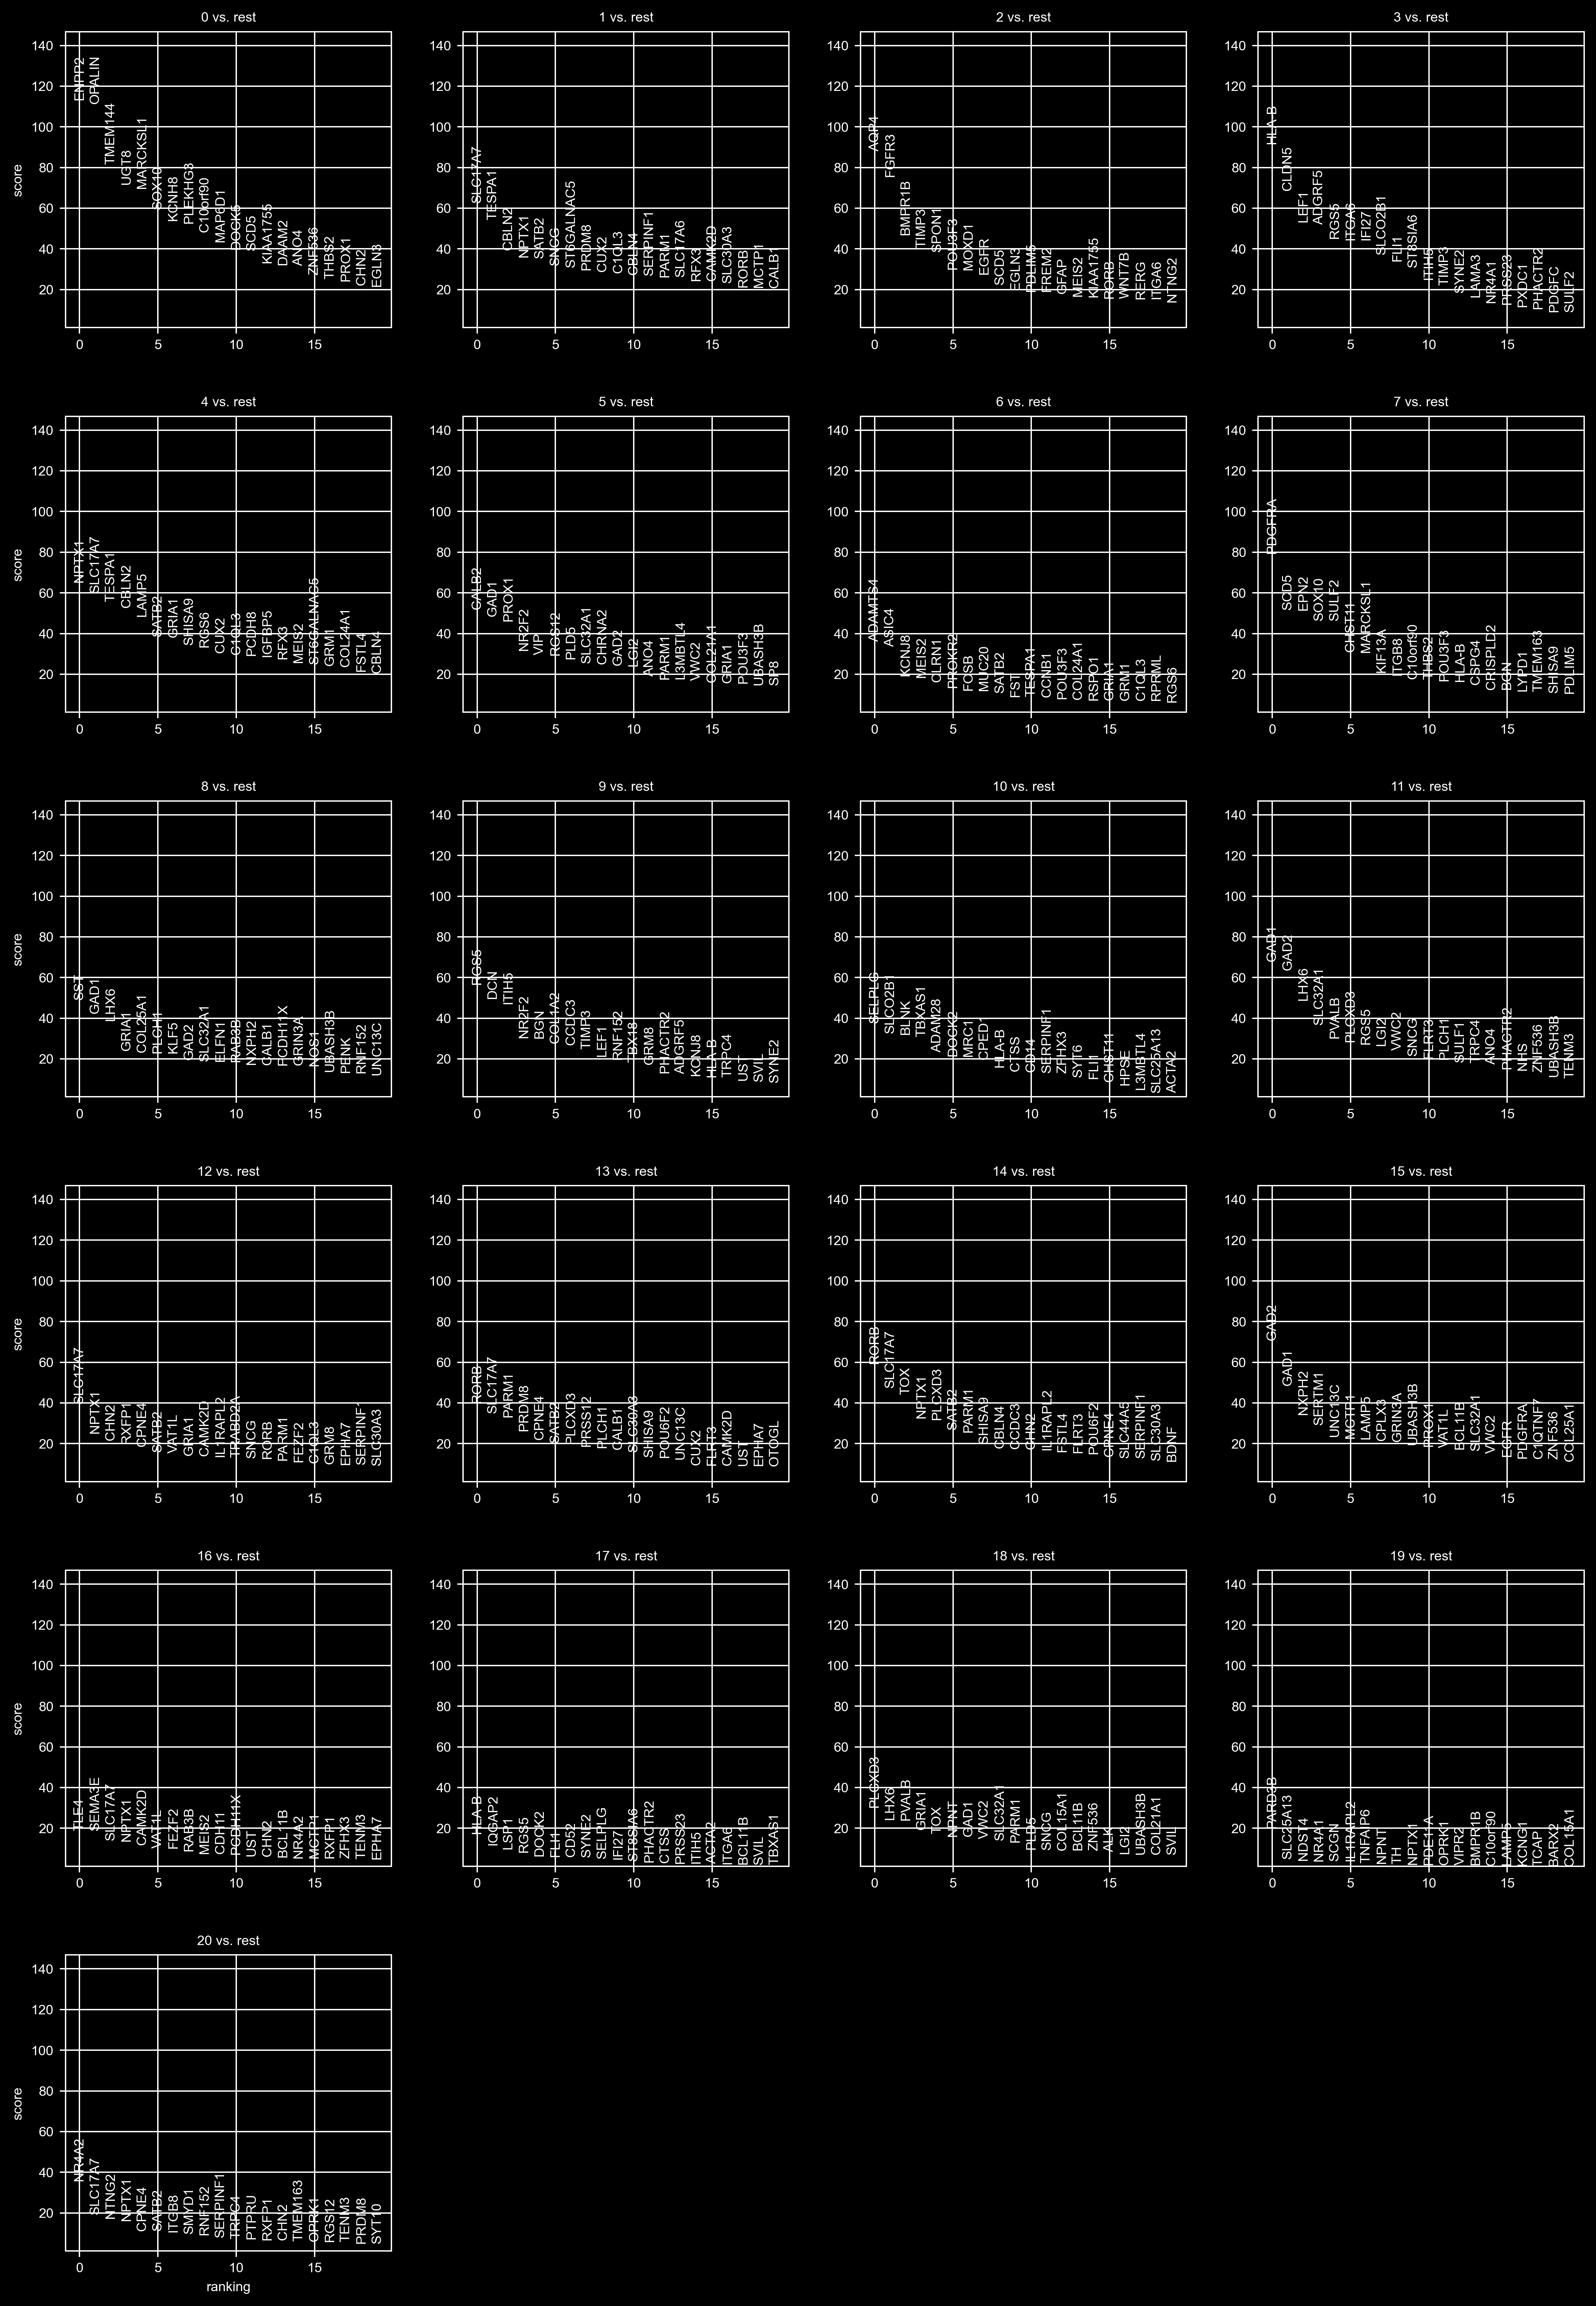

In [112]:
sc.pl.rank_genes_groups(adata, groupby='leiden_cluster')

In [137]:
np.array([list(_gnames) for _gnames in adata.uns['rank_genes_groups']['names']])[:1]

array([['ENPP2', 'SLC17A7', 'AQP4', 'HLA-B', 'NPTX1', 'CALB2', 'ADAMTS4',
        'PDGFRA', 'SST', 'RGS5', 'SELPLG', 'GAD1', 'SLC17A7', 'RORB',
        'RORB', 'GAD2', 'TLE4', 'HLA-B', 'PLCXD3', 'PARD3B', 'NR4A2']],
      dtype='<U10')

# 7. Save the analyzed MERFISH adata in h5ad for later use (e.g., cell classifer)

In [67]:
save_filename = os.path.join(os.path.join(postanalysis_folder, 'filtered_cluster_data.h5ad'))

overwrite = True

if not os.path.exists(save_filename) or overwrite:
    print(f"save adata into file: {save_filename}")
    adata.write(save_filename)
else:
    print(f"savefile: {save_filename} already exists")

save adata into file: I:\MERFISH_Analysis\20221003-hMTG_hM1\PostAnalysis\filtered_cluster_data.h5ad


# Load Tiff image

In [34]:
import tifffile


In [60]:
fov_id = 4
decode_image_filename = os.path.join(r'D:\MERFISH_Analysis\20221008-thymus_MOp_test\Decode\images', f'decoded{fov_id}.tif')
im = tifffile.imread(decode_image_filename)

<IPython.core.display.Javascript object>


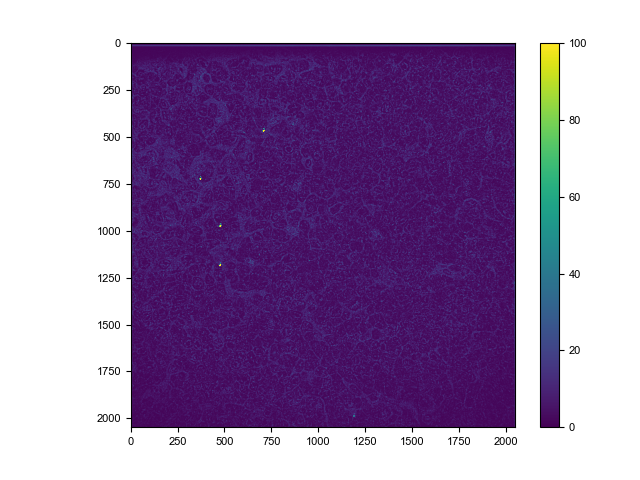

C:\Users\puzheng\AppData\Local\Temp\ipykernel_20960\888671906.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


In [61]:
%matplotlib notebook
plt.figure()
plt.imshow(im[1::3][2], vmin=0, vmax=100)
plt.grid(False)
plt.colorbar()
plt.show()